In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import matplotlib
matplotlib.rc('pdf', fonttype=42)

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import tools as t
import numpy as np

In [4]:
import seaborn as sns
sns.reset_orig()

In [5]:
#!scp frank:/import/dima-scratch/phd-buildout/experiments/emnlp14/results_all.csv .

In [6]:
!wc -l results_all.csv

255091 results_all.csv


In [7]:
results = t.read_results().swaplevel('operator', 0).sort_index()

# Max selection

In [8]:
max_selection_simlex = t.plot_selection(
    results[results.index.get_level_values('operator') == 'head'],
    dataset='SimLex999',
    selector_function=t.max_('men'),
    plot=False,
)

In [9]:
max_selection_men = t.plot_selection(
    results[results.index.get_level_values('operator') == 'head'],
    dataset='men',
    selector_function=t.max_('SimLex999'),
    plot=False,
)

# Cross-validation

In [10]:
cross_validation_selection_simlex = t.plot_selection(
    results[results.index.get_level_values('operator') == 'head'],
    dataset='SimLex999',
    selector_function=t.cross_validation('men'),
    plot=False,
)

In [11]:
cross_validation_selection_men = t.plot_selection(
    results[results.index.get_level_values('operator') == 'head'],
    dataset='men',
    selector_function=t.cross_validation('SimLex999'),
    plot=False,
)

# Heuristics

## SimLex-999

In [12]:
parameters = [
    'dimensionality', 'discr', 'cds', 'freq', 'neg', 'similarity',
]

In [13]:
t.anova(
    response='SimLex999',
    predictors=parameters,
    data=results,
).rsquared_adj

0.86701695238077925

In [14]:
feature_ablation_simlex = t.calculate_feature_ablation(
    responses=(
        'SimLex999',
        # 'men',
    ),
    predictors=parameters,
    data=results,
)

# feature_ablation.plot(kind='barh')#.get_figure().savefig('figures/emnlp2013_turk-parameter-ablation.pdf')
feature_ablation_simlex.sort_values(('partial R2', 'SimLex999'), ascending=False, inplace=True)

feature_ablation_simlex.round(2)

partial R2
response        SimLex999
predictor                
similarity           0.38
freq                 0.27
neg                  0.24
dimensionality       0.08
discr                0.08
cds                  0.06

In [15]:
(
    feature_ablation_simlex['partial R2']
    .reset_index()
    .round({'SimLex999': 2})
    .to_latex('figures/SimLex999-ablation.tex', index=False)
)

In [16]:
heuristics_selection_collection_simlex = {}

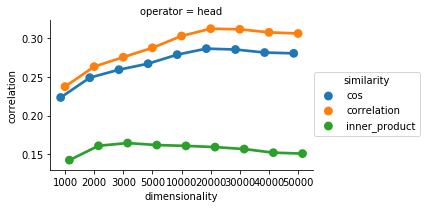

In [17]:
_ = t.plot_interaction(results['max'], feature_ablation_simlex.index[0], 'SimLex999', ylabels=['correlation'])

In [18]:
assert feature_ablation_simlex.index[0] == 'similarity'
r = results['max'].reset_index()

heuristics_selection_collection_simlex[0] = r.loc[
    r['similarity'] == 'correlation'
]

In [19]:
_ = (
    results.loc['head', ('max', 'SimLex999')]
    .unstack(['similarity', 'dimensionality'])
)

(
    ((_['correlation'] - _['cos']) > 0.023)
    .sum(axis=0) / _.shape[0]
    
).round(2)

(_['correlation'].mean(axis=0) - _['cos'].mean(axis=0)) > 0.023

dimensionality
1000     False
2000     False
3000     False
5000     False
10000     True
20000     True
30000     True
40000     True
50000     True
dtype: bool

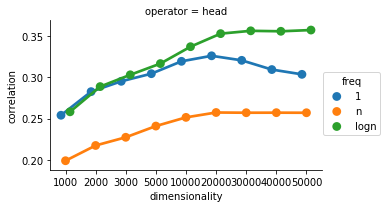

In [20]:
t.plot_interaction(heuristics_selection_collection_simlex[0], feature_ablation_simlex.index[1], 'SimLex999', ylabels=['correlation'])

In [21]:
assert feature_ablation_simlex.index[1] == 'freq'

r = heuristics_selection_collection_simlex[0]

heuristics_selection_collection_simlex[1] =  r.loc[
    r['freq'] == 'logn'
]

In [22]:
_ = (
    heuristics_selection_collection_simlex[0]
    .set_index(['operator'] + parameters).loc['head']['SimLex999']
    .unstack(['freq', 'similarity', 'dimensionality'])
)

(
    _['logn'].mean(axis=0) -
    _['1'].mean(axis=0)
) > 0.023

similarity   dimensionality
correlation  1000              False
             2000              False
             3000              False
             5000              False
             10000             False
             20000              True
             30000              True
             40000              True
             50000              True
dtype: bool

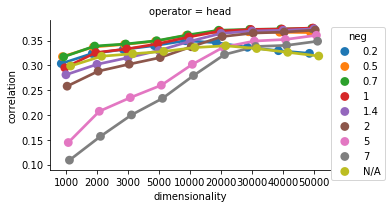

In [23]:
t.plot_interaction(heuristics_selection_collection_simlex[1], feature_ablation_simlex.index[2], 'SimLex999', ylabels=['correlation'])

In [24]:
assert feature_ablation_simlex.index[2] == 'neg'

r = heuristics_selection_collection_simlex[1]

heuristics_selection_collection_simlex[2] =  r.loc[
    (r['neg'] == 0.7)
]

In [25]:
_ = (
    heuristics_selection_collection_simlex[1]
    .set_index(['operator'] + parameters).loc['head']['SimLex999']
    .unstack(['neg', 'dimensionality'])
)
(
    _.mean(axis=0).unstack('neg').apply(lambda c: _[0.7].mean() - c, axis=0)
) > 0.023

neg               0.2    0.5    0.7    1.0    1.4    2.0    5.0   7.0    N/A
dimensionality                                                              
1000            False  False  False  False   True   True   True  True  False
2000            False  False  False  False   True   True   True  True  False
3000            False  False  False  False   True   True   True  True  False
5000            False  False  False  False  False   True   True  True  False
10000           False  False  False  False  False   True   True  True   True
20000            True  False  False  False  False  False   True  True   True
30000            True  False  False  False  False  False   True  True   True
40000            True  False  False  False  False  False  False  True   True
50000            True  False  False  False  False  False  False  True   True

In [26]:
# x.apply(lambda c: c * - 1, axis=1)

In [27]:
# Skip dimensionality
assert feature_ablation_simlex.index[3] == 'dimensionality'

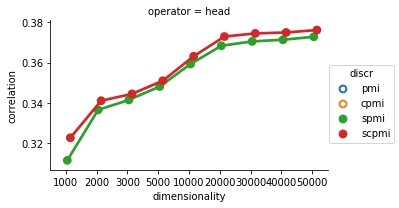

In [28]:
t.plot_interaction(heuristics_selection_collection_simlex[2], feature_ablation_simlex.index[4], 'SimLex999', ylabels=['correlation'])

In [29]:
assert feature_ablation_simlex.index[4] == 'discr'

r = heuristics_selection_collection_simlex[2]

heuristics_selection_collection_simlex[3] =  r.loc[
    (r['discr'] == 'scpmi')
]

In [30]:
_ = (
    heuristics_selection_collection_simlex[2]
    .set_index(['operator'] + parameters).loc['head']['SimLex999']
    .unstack(['discr', 'dimensionality'])
)
_
(
    np.abs(_['scpmi'].mean(axis=0) - _['spmi'].mean(axis=0))
) > 0.023

dimensionality
1000     False
2000     False
3000     False
5000     False
10000    False
20000    False
30000    False
40000    False
50000    False
dtype: bool

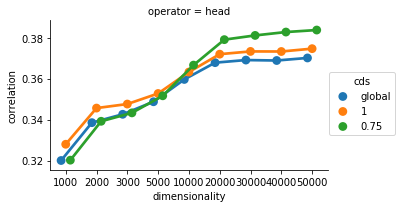

In [31]:
t.plot_interaction(heuristics_selection_collection_simlex[3], feature_ablation_simlex.index[5], 'SimLex999', ylabels=['correlation'])

In [32]:
assert feature_ablation_simlex.index[5] == 'cds'

r = heuristics_selection_collection_simlex[3]

heuristics_selection_collection_simlex[4] =  r.loc[
    # *skip tuning for 50K
    (~(r['dimensionality'] < 10000) | ((r['cds'] == '1'))) &
    (~(r['dimensionality'] >= 10000) | ((r['cds'] == '0.75'))) &
    True
]

In [33]:
_ = (
    heuristics_selection_collection_simlex[3]
    .set_index(['operator'] + parameters).loc['head']['SimLex999']
    .unstack(['cds', 'dimensionality'])
)
(
    np.abs(_['0.75'].mean(axis=0) - _['1'].mean(axis=0))
) > 0.023

dimensionality
1000     False
2000     False
3000     False
5000     False
10000    False
20000    False
30000    False
40000    False
50000    False
dtype: bool

In [34]:
assert len(feature_ablation_simlex) == 6

In [35]:
heuristics_selection_simlex = heuristics_selection_collection_simlex[4].set_index(['operator', 'dimensionality'], drop=False)
heuristics_selection_simlex['selection'] = 'heuristics'

## MEN

In [36]:
t.anova(
    response='men',
    predictors=parameters,
    data=results,
).rsquared_adj

0.73306515868630373

In [37]:
feature_ablation_men = t.calculate_feature_ablation(
    responses=(
        'men',
    ),
    predictors=parameters,
    data=results,
)

# feature_ablation.plot(kind='barh')#.get_figure().savefig('figures/emnlp2013_turk-parameter-ablation.pdf')
feature_ablation_men.sort_values(('partial R2', 'men'), ascending=False, inplace=True)

feature_ablation_men.round(2)

partial R2
response              men
predictor                
neg                  0.31
freq                 0.20
similarity           0.18
discr                0.12
dimensionality       0.11
cds                  0.09

In [38]:
(
    feature_ablation_men['partial R2']
    .reset_index()
    .round({'men': 2})
    .to_latex('figures/men-ablation.tex', index=False)
)

In [39]:
_ = (
    results['max', 'men']
    .unstack(['neg', 'dimensionality'])
)

# _.mean(axis=0).unstack('neg').max(axis=1)
(
    _.mean(axis=0).unstack('neg').apply(lambda c: _.mean(axis=0).unstack('neg').max(axis=1) - c, axis=0)
) > 0.013

neg              0.2   0.5   0.7    1.0    1.4    2.0    5.0    7.0   N/A
dimensionality                                                           
1000            True  True  True  False   True   True   True   True  True
2000            True  True  True  False  False  False   True   True  True
3000            True  True  True   True  False  False   True   True  True
5000            True  True  True   True  False  False   True   True  True
10000           True  True  True   True  False  False   True   True  True
20000           True  True  True   True   True  False  False   True  True
30000           True  True  True   True   True  False  False  False  True
40000           True  True  True   True   True  False  False  False  True
50000           True  True  True   True   True   True  False  False  True

In [40]:
heuristics_selection_collection_men = {}

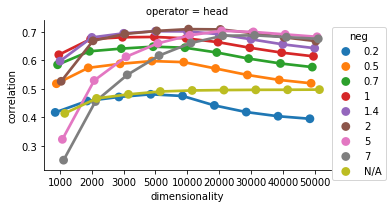

In [41]:
t.plot_interaction(results['max'], feature_ablation_men.index[0], 'men', ylabels=['correlation'])

In [42]:
assert feature_ablation_men.index[0] == 'neg'

r = results['max'].reset_index()

heuristics_selection_collection_men[0] =  r.loc[
    # *coarse selection
    (~(r['dimensionality'] < 20000) | ((r['neg'] == 2) | (r['neg'] == 'N/A'))) &
    (~(r['dimensionality'] >= 20000) | ((r['neg'] == 5) | (r['neg'] == 'N/A'))) &
    True
]

In [43]:
_ = (
    heuristics_selection_collection_men[0]
    .set_index(['operator'] + parameters).loc['head']['men']
    .unstack(['freq', 'dimensionality'])
)

(
    _.mean(axis=0).unstack('freq').apply(lambda c: _.mean(axis=0).unstack('freq').max(axis=1) - c, axis=0)
) > 0.013

freq                1   logn     n
dimensionality                    
1000            False  False  True
2000             True  False  True
3000             True  False  True
5000             True  False  True
10000            True  False  True
20000            True  False  True
30000            True  False  True
40000            True  False  True
50000            True  False  True

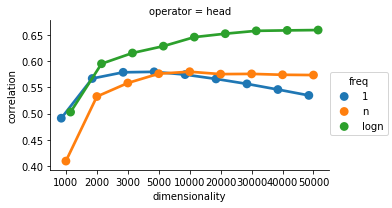

In [44]:
t.plot_interaction(heuristics_selection_collection_men[0], feature_ablation_men.index[1], 'men', ylabels=['correlation'])

In [45]:
assert feature_ablation_men.index[1] == 'freq'

r = heuristics_selection_collection_men[0]

heuristics_selection_collection_men[1] =  r.loc[
    (r['freq'] == 'logn')
]

In [46]:
_ = (
    heuristics_selection_collection_men[1]
    .set_index(['operator'] + parameters).loc['head']['men']
    .unstack(['similarity', 'dimensionality'])
)

(
    _.mean(axis=0).unstack('similarity').apply(lambda c: _.mean(axis=0).unstack('similarity').max(axis=1) - c, axis=0)
) > 0.013

similarity     correlation   cos inner_product
dimensionality                                
1000                 False  True          True
2000                 False  True          True
3000                 False  True          True
5000                 False  True          True
10000                False  True          True
20000                False  True          True
30000                False  True          True
40000                False  True          True
50000                False  True          True

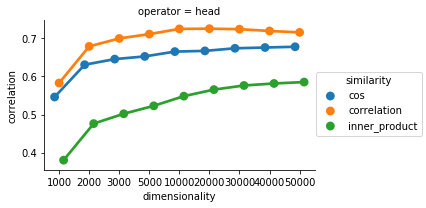

In [47]:
t.plot_interaction(heuristics_selection_collection_men[1], feature_ablation_men.index[2], 'men', ylabels=['correlation'])

In [48]:
assert feature_ablation_men.index[2] == 'similarity'

r = heuristics_selection_collection_men[1]

heuristics_selection_collection_men[2] =  r.loc[
    (r['similarity'] == 'correlation')
]

In [49]:
_ = (
    heuristics_selection_collection_men[2]
    .set_index(['operator'] + parameters).loc['head']['men']
    .unstack(['discr', 'dimensionality'])
)

(
    _.mean(axis=0).unstack('discr').apply(lambda c: _.mean(axis=0).unstack('discr').max(axis=1) - c, axis=0)
) > 0.013

discr            cpmi   pmi  scpmi   spmi
dimensionality                           
1000            False  True   True   True
2000            False  True   True  False
3000            False  True  False  False
5000            False  True  False  False
10000           False  True  False  False
20000           False  True   True  False
30000           False  True   True  False
40000           False  True   True  False
50000           False  True   True  False

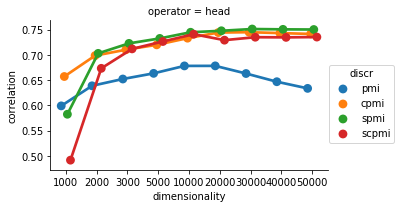

In [50]:
t.plot_interaction(heuristics_selection_collection_men[2], feature_ablation_men.index[3], 'men', ylabels=['correlation'])

In [51]:
assert feature_ablation_men.index[3] == 'discr'

r = heuristics_selection_collection_men[2]

heuristics_selection_collection_men[3] =  r.loc[
    (r['discr'] == 'spmi')
]

In [52]:
# Skip dimensionality
assert feature_ablation_men.index[4] == 'dimensionality'

In [53]:
_ = (
    heuristics_selection_collection_men[3]
    .set_index(['operator'] + parameters).loc['head']['men']
    .unstack(['cds', 'dimensionality'])
)

(
    _.mean(axis=0).unstack('cds').apply(lambda c: _.mean(axis=0).unstack('cds').max(axis=1) - c, axis=0)
) > 0.013

cds              0.75      1 global
dimensionality                     
1000             True   True  False
2000             True   True  False
3000            False  False  False
5000            False  False  False
10000           False  False  False
20000            True  False  False
30000            True  False  False
40000            True  False  False
50000            True  False  False

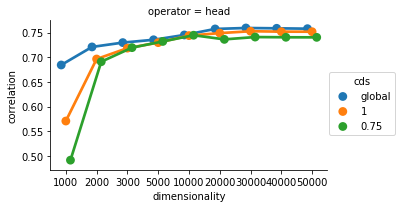

In [54]:
t.plot_interaction(heuristics_selection_collection_men[3], feature_ablation_men.index[5], 'men', ylabels=['correlation'])

In [55]:
assert feature_ablation_men.index[5] == 'cds'

r = heuristics_selection_collection_men[3]

heuristics_selection_collection_men[4] =  r.loc[
    (r['cds'] == 'global')
]

In [56]:
assert len(feature_ablation_men) == 6

In [57]:
heuristics_selection_men = heuristics_selection_collection_men[4].set_index(['operator', 'dimensionality'], drop=False)
heuristics_selection_men['selection'] = 'heuristics'

#  Parameter selection comparison

In [58]:
'{:.2f}'.format(
    t.average_error(
        max_selection_simlex,
        heuristics_selection_simlex,
        'SimLex999',
    ),
)

'0.04'

In [59]:
'{:.2f}'.format(
    t.average_error(
        max_selection_men,
        heuristics_selection_men,
        'men',
    ),
)

'0.01'

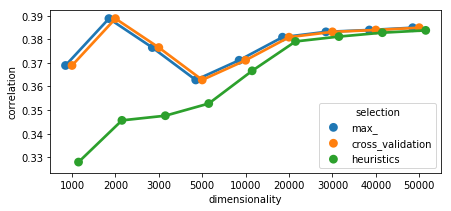

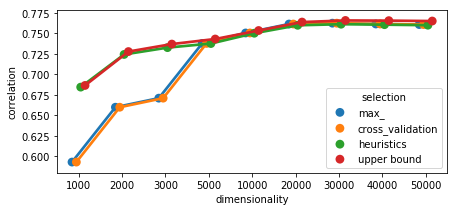

In [60]:
f, ax = plt.subplots(figsize=(7, 3))

t.plot_parameter_selection_comparison(
    [
        max_selection_simlex,
        cross_validation_selection_simlex,
        heuristics_selection_simlex,
    ],
    'SimLex999',
    ax=ax,
    ylabel='correlation',
)
f.savefig('figures/SimLex999-results.pdf')

f, ax = plt.subplots(figsize=(7, 3))
t.plot_parameter_selection_comparison(
    [
        max_selection_simlex,
        cross_validation_selection_simlex,
        heuristics_selection_simlex,

        max_selection_men.assign(selection='upper bound')
    ],
    'SimLex999',
    'men',
    ax=ax,
    ylabel='correlation',
)

f.savefig('figures/SimLex999-transfer.pdf')

In [61]:
max_selection_simlex.sort_index().round({'SimLex999': 2}).loc['head'].reset_index(drop=True).to_latex(
    'figures/SimLex999-max_-selection.tex',
    columns=[
        'dimensionality',
        'SimLex999',
        'freq',
        'discr',
        'cds',
        'neg',
        'similarity',
    ],
    index=False,
)

In [62]:
heuristics_selection_simlex.sort_index().round({'SimLex999': 2}).loc['head'].reset_index(drop=True).to_latex(
    'figures/SimLex999-heuristics-selection.tex',
    columns=[
        'dimensionality',
        'SimLex999',
        'freq',
        'discr',
        'cds',
        'neg',
        'similarity',
    ],
    index=False,
)

In [63]:
max_selection_simlex.loc['head']['SimLex999'] - heuristics_selection_simlex.loc['head']['SimLex999'] > 0.023

dimensionality
1000      True
2000      True
3000      True
5000     False
10000    False
20000    False
30000    False
40000    False
50000    False
Name: SimLex999, dtype: bool

#### MEN

In [64]:
max_selection_men.sort_index().round({'men': 2}).loc['head'].reset_index(drop=True).to_latex(
    'figures/men-max_-selection.tex',
    columns=[
        'dimensionality',
        'men',
        'freq',
        'discr',
        'cds',
        'neg',
        'similarity',
    ],
    index=False,
)

In [65]:
heuristics_selection_men.sort_index().round({'men': 2}).loc['head'].reset_index(drop=True).to_latex(
    'figures/men-heuristics-selection.tex',
    columns=[
        'dimensionality',
        'men',
        'freq',
        'discr',
        'cds',
        'neg',
        'similarity',
    ],
    index=False,
)

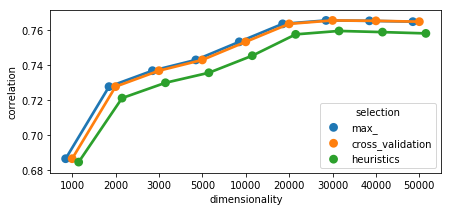

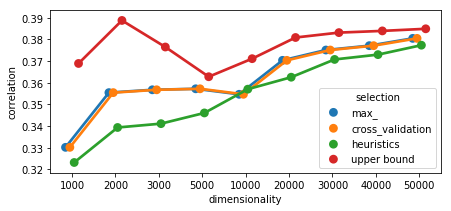

In [66]:
f, ax = plt.subplots(figsize=(7, 3))
t.plot_parameter_selection_comparison(
    [
        max_selection_men,
        cross_validation_selection_men,
        heuristics_selection_men,
    ],
    'men',
    ax=ax,
    ylabel='correlation',
)
f.savefig('figures/men-results.pdf')

f, ax = plt.subplots(figsize=(7, 3))
t.plot_parameter_selection_comparison(
    [
        max_selection_men,
        cross_validation_selection_men,
        heuristics_selection_men,

        max_selection_simlex.assign(selection='upper bound')
    ],
    'men',
    'SimLex999',
    ax=ax,
    ylabel='correlation',
)
f.savefig('figures/men-transfer.pdf')

In [67]:
'SimLex-999 to MEN (heuristics): {:.2f}'.format(
    t.average_error(
        max_selection_men,
        heuristics_selection_simlex,
        'men',
    ),
)

'SimLex-999 to MEN (heuristics): 0.01'

In [68]:
max_selection_men.loc['head']['men'] - heuristics_selection_simlex.loc['head']['men'] > 0.013

dimensionality
1000     False
2000     False
3000     False
5000     False
10000    False
20000    False
30000    False
40000    False
50000    False
Name: men, dtype: bool

In [69]:
'SimLex-999 to MEN (max): {:.2f}'.format(
    t.average_error(
        max_selection_men,
        max_selection_simlex,
        'men',
    ),
)

'SimLex-999 to MEN (max): 0.04'

In [70]:
max_selection_men.loc['head']['men'] - max_selection_simlex.loc['head']['men'] > 0.013

dimensionality
1000      True
2000      True
3000      True
5000     False
10000    False
20000    False
30000    False
40000    False
50000    False
Name: men, dtype: bool

In [71]:
'MEN to SimLex999 (heuristics): {:.2f}'.format(
    t.average_error(
        max_selection_simlex,
        heuristics_selection_men,
        'SimLex999',
    ),
)

'MEN to SimLex999 (heuristics): 0.06'

In [72]:
max_selection_simlex.loc['head']['SimLex999'] - heuristics_selection_men.loc['head']['SimLex999'] > 0.023

dimensionality
1000      True
2000      True
3000      True
5000     False
10000    False
20000    False
30000    False
40000    False
50000    False
Name: SimLex999, dtype: bool

In [73]:
'MEN to SimLex999 (heuristics): {:.2f}'.format(
    t.average_error(
        max_selection_simlex,
        max_selection_men,
        'SimLex999',
    ),
)

'MEN to SimLex999 (heuristics): 0.04'

In [74]:
max_selection_simlex.loc['head']['SimLex999'] - max_selection_men.loc['head']['SimLex999'] > 0.023

dimensionality
1000      True
2000      True
3000     False
5000     False
10000    False
20000    False
30000    False
40000    False
50000    False
Name: SimLex999, dtype: bool

## Union

In [75]:
'{:.3f}'.format(
    ((0.023 / results['max', 'SimLex999'].max()) + (0.013 / results['max', 'men'].max())) / 2
)

'0.038'

In [76]:
results['max', 'lexical'] = (
    (
        (results['max', 'SimLex999'] / results['max', 'SimLex999'].max()) +
        (results['max', 'men'] / results['max', 'men'].max())
    ) / 2
)

In [77]:
max_selection_lexical = t.plot_selection(
    results[results.index.get_level_values('operator') == 'head'],
    dataset='lexical',
    selector_function=t.max_('SimLex999', 'men', 'KS14', 'GS11', 'PhraseRel'),
    plot=False,
)

#### Heuristics

In [78]:
'{:.3f}'.format(
        t.anova(
        response='lexical',
        predictors=parameters,
        data=results[results.index.get_level_values('operator') == 'head'],
    ).rsquared_adj
)

'0.817'

In [79]:
feature_ablation_lexical = t.calculate_feature_ablation(
    responses=(
        'lexical',
    ),
    predictors=parameters,
    data=results[results.index.get_level_values('operator') == 'head'],
)

feature_ablation_lexical.sort_values(('partial R2', 'lexical'), ascending=False, inplace=True)

feature_ablation_lexical.round(3)

partial R2
response          lexical
predictor                
similarity          0.299
neg                 0.280
freq                0.231
dimensionality      0.095
discr               0.095
cds                 0.076

In [80]:
(
    feature_ablation_lexical['partial R2']
    .reset_index()
    .round({'lexical': 3})
    .to_latex('figures/lexical-ablation.tex', index=False)
)

In [81]:
_ = (
    results.loc['head', ('max', 'lexical')]
    .unstack(['similarity', 'dimensionality'])
)
np.abs(_['correlation'].mean(axis=0) - _['cos'].mean(axis=0)) > 0.038

dimensionality
1000     False
2000     False
3000     False
5000     False
10000     True
20000     True
30000     True
40000     True
50000     True
dtype: bool

In [82]:
heuristics_selection_collection_lexical = {}

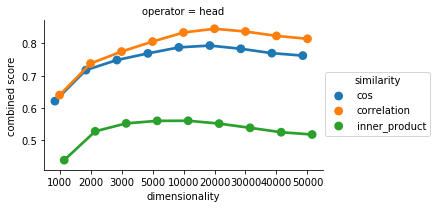

In [83]:
t.plot_interaction(results[results.index.get_level_values('operator') == 'head']['max'], feature_ablation_lexical.index[0], 'lexical', ylabels=['combined score'])

In [84]:
assert feature_ablation_lexical.index[0] == 'similarity'

r = results[results.index.get_level_values('operator') == 'head']['max'].reset_index()

heuristics_selection_collection_lexical[0] = r.loc[
    r['similarity'] == 'correlation'
]

In [85]:
# heuristics_selection_collection_lexical[0]

In [86]:
_ = (
    heuristics_selection_collection_lexical[0]
    .set_index(['operator'] + parameters).loc['head']['lexical']
    .unstack(['neg', 'dimensionality'])
)

# _.mean(axis=0).unstack('neg').max(axis=1)
(
    _.mean(axis=0).unstack('neg').apply(lambda c: _.mean(axis=0).unstack('neg').max(axis=1) - c, axis=0)
) > 0.038

neg              0.2   0.5    0.7    1.0    1.4    2.0    5.0    7.0   N/A
dimensionality                                                            
1000            True  True  False  False  False   True   True   True  True
2000            True  True  False  False  False   True   True   True  True
3000            True  True  False  False  False  False   True   True  True
5000            True  True  False  False  False  False   True   True  True
10000           True  True  False  False  False  False   True   True  True
20000           True  True   True  False  False  False  False   True  True
30000           True  True   True   True  False  False  False  False  True
40000           True  True   True   True  False  False  False  False  True
50000           True  True   True   True   True  False  False  False  True

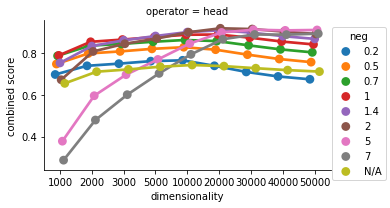

In [87]:
t.plot_interaction(heuristics_selection_collection_lexical[0], feature_ablation_lexical.index[1], 'lexical', ylabels=['combined score'])

In [88]:
assert feature_ablation_lexical.index[1] == 'neg'

r = heuristics_selection_collection_lexical[0]

heuristics_selection_collection_lexical[1] =  r.loc[
    (~(r['dimensionality'] < 20000) | (r['neg'] == 1)) &
    (~(r['dimensionality'] >= 20000) | (r['neg'] == 2)) &

    True
]

In [89]:
_ = (
    heuristics_selection_collection_lexical[1]
    .set_index(['operator'] + parameters).loc['head']['lexical']
    .unstack(['freq', 'dimensionality'])
)

(
    _.mean(axis=0).unstack('freq').apply(lambda c: _.mean(axis=0).unstack('freq').max(axis=1) - c, axis=0)
) > 0.038

freq                1   logn     n
dimensionality                    
1000            False  False  True
2000            False  False  True
3000            False  False  True
5000            False  False  True
10000           False  False  True
20000           False  False  True
30000            True  False  True
40000            True  False  True
50000            True  False  True

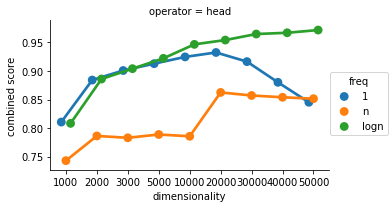

In [90]:
t.plot_interaction(heuristics_selection_collection_lexical[1], feature_ablation_lexical.index[2], 'lexical', ylabels=['combined score'])

In [91]:
assert feature_ablation_lexical.index[2] == 'freq'

r = heuristics_selection_collection_lexical[1]

heuristics_selection_collection_lexical[2] =  r.loc[
    r['freq'] == 'logn'
]

In [92]:
assert feature_ablation_lexical.index[3] == 'dimensionality'

In [93]:
_ = (
    heuristics_selection_collection_lexical[2]
    .set_index(['operator'] + parameters).loc['head']['lexical']
    .unstack(['discr', 'dimensionality'])
)

(
    _.mean(axis=0).unstack('discr').apply(lambda c: _.mean(axis=0).unstack('discr').max(axis=1) - c, axis=0)
) > 0.038

discr           scpmi   spmi
dimensionality              
1000            False  False
2000            False  False
3000            False  False
5000            False  False
10000           False  False
20000           False  False
30000           False  False
40000           False  False
50000           False  False

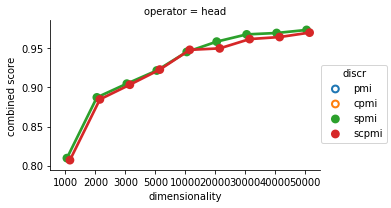

In [94]:
t.plot_interaction(heuristics_selection_collection_lexical[2], feature_ablation_lexical.index[4], 'lexical', ylabels=['combined score'])

In [95]:
assert feature_ablation_lexical.index[4] == 'discr'

r = heuristics_selection_collection_lexical[2]

heuristics_selection_collection_lexical[3] =  r.loc[
    r['discr'] == 'scpmi'
]

In [96]:
_ = (
    heuristics_selection_collection_lexical[3]
    .set_index(['operator'] + parameters).loc['head']['lexical']
    .unstack(['cds', 'dimensionality'])
)

(
    _.mean(axis=0).unstack('cds').apply(lambda c: _.mean(axis=0).unstack('cds').max(axis=1) - c, axis=0)
) > 0.038

cds              0.75      1 global
dimensionality                     
1000             True   True  False
2000             True   True  False
3000            False  False  False
5000            False  False  False
10000           False  False  False
20000            True  False  False
30000            True  False  False
40000           False  False  False
50000           False  False  False

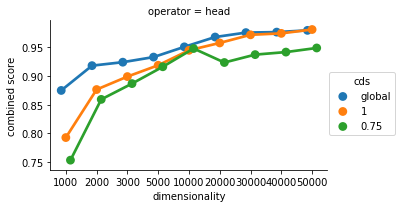

In [97]:
t.plot_interaction(heuristics_selection_collection_lexical[3], feature_ablation_lexical.index[5], 'lexical', ylabels=['combined score'])

In [98]:
assert feature_ablation_lexical.index[5] == 'cds'

r = heuristics_selection_collection_lexical[3]

heuristics_selection_collection_lexical[4] =  r.loc[
    r['cds'] == 'global'
]

In [99]:
assert len(feature_ablation_lexical) == 6

In [100]:
heuristics_selection_lexical = heuristics_selection_collection_lexical[4].set_index(['operator', 'dimensionality'], drop=False)
heuristics_selection_lexical['selection'] = 'heuristics'

In [101]:
max_selection_lexical.sort_index().round(
    {
        'men': 2,
        'SimLex999': 2,
        'lexical': 2,
    }
).loc['head'].reset_index(drop=True).to_latex(
    'figures/lexical-max-selection.tex',
    columns=[
        'dimensionality',
        'SimLex999',
        'men',
        'lexical',
        'freq',
        'discr',
        'cds',
        'neg',
        'similarity',
    ],
    index=False,
)

In [102]:
heuristics_selection_lexical.sort_index().round(
    {
        'men': 2,
        'SimLex999': 2,
        'lexical': 2,
    }
).loc['head'].reset_index(drop=True).to_latex(
    'figures/lexical-heuristics-selection.tex',
    columns=[
        'dimensionality',
        'SimLex999',
        'men',
        'lexical',
        'freq',
        'discr',
        'cds',
        'neg',
        'similarity',
    ],
    index=False,
)

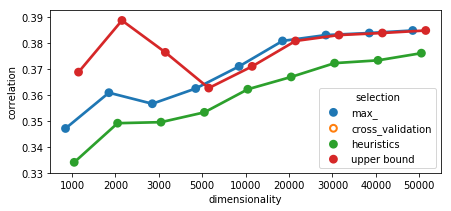

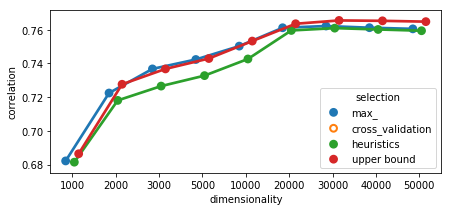

In [103]:
f, ax = plt.subplots(figsize=(7, 3))
t.plot_parameter_selection_comparison(
    [
        max_selection_lexical,
        heuristics_selection_lexical,
        
        max_selection_simlex.assign(selection='upper bound')
    ],
    'SimLex999',
    'SimLex999',
    ax=ax,
    ylabel='correlation'
)
f.savefig('figures/lexical-results-SimLex999.pdf')

f, ax = plt.subplots(figsize=(7, 3))
t.plot_parameter_selection_comparison(
    [
        max_selection_lexical,
        heuristics_selection_lexical,

        max_selection_men.assign(selection='upper bound'),
    ],
    'men',
    'men',
    ax=ax,
    ylabel='correlation'
)
f.savefig('figures/lexical-results-men.pdf')

In [104]:
'Lexical on SimLex999 (max): {:.2f}'.format(
    t.average_error(
        max_selection_simlex,
        max_selection_lexical,
        'SimLex999',
    ),
)

'Lexical on SimLex999 (max): 0.02'

In [105]:
'Lexical on men (max): {:.2f}'.format(
    t.average_error(
        max_selection_men,
        max_selection_lexical,
        'men',
    ),
)

'Lexical on men (max): 0.00'

In [106]:
'Lexical on SimLex999 (heuristics): {:.2f}'.format(
    t.average_error(
        max_selection_simlex,
        heuristics_selection_lexical,
        'SimLex999',
    ),
)

'Lexical on SimLex999 (heuristics): 0.05'

In [107]:
'Lexical on men (heuristics): {:.2f}'.format(
    t.average_error(
        max_selection_men,
        heuristics_selection_lexical,
        'men',
    ),
)

'Lexical on men (heuristics): 0.01'

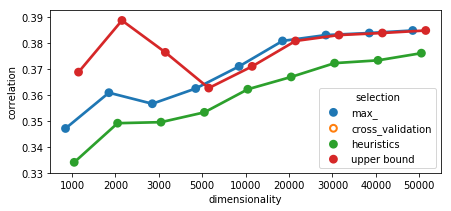

In [108]:
f, ax = plt.subplots(figsize=(7, 3))
t.plot_parameter_selection_comparison(
    [
        max_selection_lexical,
        heuristics_selection_lexical,

        max_selection_simlex.assign(selection='upper bound')
    ],
    'lexical',
    'SimLex999',
    ax=ax,
    ylabel='correlation'
)
# f.savefig('figures/SimLex999-transfer.pdf')

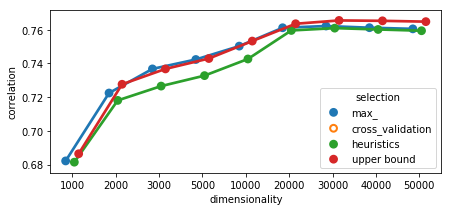

In [109]:
f, ax = plt.subplots(figsize=(7, 3))
t.plot_parameter_selection_comparison(
    [
        max_selection_lexical,
        heuristics_selection_lexical,

        max_selection_men.assign(selection='upper bound')
    ],
    'lexical',
    'men',
    ax=ax,
    ylabel='correlation'
)
# f.savefig('figures/SimLex999-transfer.pdf')

# Compositional

## Max

In [110]:
max_selection_ks14 = t.plot_selection(
    results[results['max', 'KS14'].notnull()],
    dataset='KS14',
    selector_function=t.max_('GS11', 'PhraseRel'),
    plot=False,
)

In [111]:
max_selection_gs11 = t.plot_selection(
    results[results['max', 'GS11'].notnull()],
    dataset='GS11',
    selector_function=t.max_('KS14', 'PhraseRel'),
    plot=False,
)

In [112]:
max_selection_phraserel = t.plot_selection(
    results,#[results['max', 'PhraseRel'].notnull()],
    dataset='PhraseRel',
    selector_function=t.max_('KS14', 'GS11'),
    plot=False,
)

## Cross-validation

In [113]:
cross_validation_selection_ks14 = t.plot_selection(
    results[results['max', 'KS14'].notnull()],
    dataset='KS14',
    selector_function=t.cross_validation('GS11', 'PhraseRel'),
    plot=False,
)

In [114]:
cross_validation_selection_gs11= t.plot_selection(
    results[results['max', 'GS11'].notnull()],
    dataset='GS11',
    selector_function=t.cross_validation('KS14', 'PhraseRel'),
    plot=False,
)

In [115]:
cross_validation_selection_phraserel = t.plot_selection(
    results[results['max', 'PhraseRel'].notnull()],
    dataset='PhraseRel',
    selector_function=t.cross_validation('KS14', 'GS11'),
    plot=False,
)

## Heuristics 

In [116]:
compositional_parameters = parameters + ['operator']

## KS14

In [117]:
'{:.2f}'.format(
        t.anova(
        response='KS14',
        predictors=compositional_parameters,
        data=results.loc[['add', 'head', 'mult', 'kron']],
    ).rsquared_adj
)

'0.79'

In [118]:
feature_ablation_ks14 = t.calculate_feature_ablation(
    responses=(
        'KS14',
    ),
    predictors=compositional_parameters,
    data=results.loc[['add', 'head', 'mult', 'kron']],
)

# feature_ablation.plot(kind='barh')#.get_figure().savefig('figures/emnlp2013_turk-parameter-ablation.pdf')
feature_ablation_ks14.sort_values(('partial R2', 'KS14'), ascending=False, inplace=True)

feature_ablation_ks14.round(2)

partial R2
response             KS14
predictor                
neg                  0.33
freq                 0.31
operator             0.30
cds                  0.14
similarity           0.06
discr                0.05
dimensionality       0.03

In [119]:
(
    feature_ablation_ks14['partial R2']
    .reset_index()
    .round({'KS14': 2})
    .to_latex('figures/ks14-ablation.tex', index=False)
)

In [120]:
_ = (
    results.loc[['head', 'add', 'mult', 'kron'], ('max', 'KS14')]
    .unstack(['neg', 'operator', 'dimensionality'])
)
_
# _.mean(axis=0)#.unstack('neg').max(axis=1)
(
    _.mean(axis=0).unstack('neg').apply(lambda c: _.mean(axis=0).unstack('neg').max(axis=1) - c, axis=0)
) > 0.07

neg                        0.2    0.5    0.7    1.0    1.4    2.0    5.0  \
operator dimensionality                                                    
add      1000             True   True  False  False  False  False   True   
         2000             True   True  False  False  False  False   True   
         3000             True   True  False  False  False  False   True   
         5000             True   True  False  False  False  False   True   
         10000            True   True   True  False  False  False  False   
         20000            True   True   True  False  False  False  False   
         30000            True   True   True  False  False  False  False   
         40000            True   True   True  False  False  False  False   
         50000            True   True   True  False  False  False  False   
head     1000             True   True  False  False  False   True   True   
         2000             True   True  False  False  False  False   True   
         3000             True   True  False  False  False  False   True   
         5000             True   True  False  False  False  False   True   
         10000            True   True  False  False  False  False   True   
         20000            True   True   True  False  False  False   True   
         30000            True   True   True  False  False  False   True   
         40000            True   True   True  False  False  False   True   
         50000            True   True   True  False  False  False   True   
kron     1000            False  False  False   True   True   True   True   
         2000            False  False  False   True   True   True   True   
         3000             True  False  False   True   True   True   True   
         5000             True  False  False  False   True   True   True   
         10000            True  False  False  False   True   True   True   
         20000            True   True  False  False   True   True   True   
         30000            True   True  False  False   True   True   True   
         40000            True   True  False  False  False   True   True   
         50000            True   True  False  False  False   True   True   
mult     1000            False  False   True   True   True   True   True   
         2000            False  False  False   True   True   True   True   
         3000            False  False  False   True   True   True   True   
         5000            False  False  False   True   True   True   True   
         10000           False  False  False  False   True   True   True   
         20000           False  False  False  False   True   True   True   
         30000           False  False  False  False   True   True   True   
         40000            True  False  False  False   True   True   True   
         50000            True  False  False  False   True   True   True   

neg                        7.0    N/A  
operator dimensionality                
add      1000             True   True  
         2000             True   True  
         3000             True   True  
         5000             True   True  
         10000            True   True  
         20000            True   True  
         30000           False   True  
         40000           False   True  
         50000           False   True  
head     1000             True   True  
         2000             True   True  
         3000             True   True  
         5000             True   True  
         10000            True   True  
         20000            True   True  
         30000            True   True  
         40000            True   True  
         50000            True   True  
kron     1000             True   True  
         2000             True   True  
         3000             True   True  
         5000            False   True  
         10000            True   True  
         20000            True   True  
         30000            True   True  
         40000            True 

In [121]:
heuristics_selection_collection_ks14 = {}

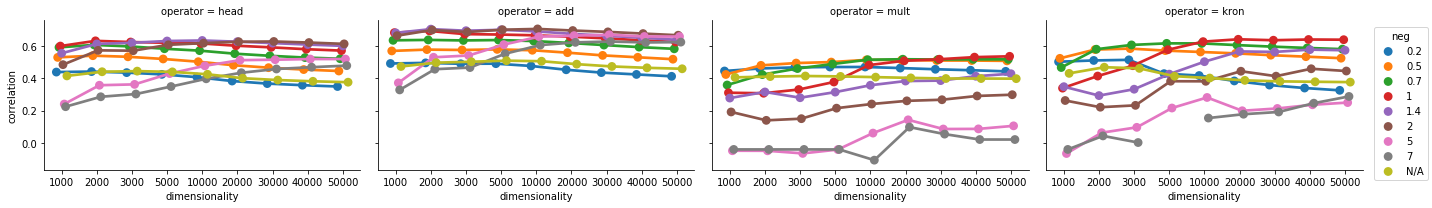

In [122]:
t.plot_interaction(results.loc[['add', 'head', 'mult', 'kron'], 'max'], feature_ablation_ks14.index[0], 'KS14', ylabels=['correlation'])

In [123]:
assert feature_ablation_ks14.index[0] == 'neg'

r = results.loc[['add', 'head', 'mult', 'kron'], 'max'].reset_index()

heuristics_selection_collection_ks14[0] =  r.loc[
    (~((r['operator'] == 'head') & (r['dimensionality'] < 5000)) | ((r['neg'] == 1))) &
    (~((r['operator'] == 'head') & (r['dimensionality'] >= 5000) & (r['dimensionality'] < 30000)) | ((r['neg'] == 1.4))) &
    (~((r['operator'] == 'head') & (r['dimensionality'] >= 30000)) | ((r['neg'] == 2))) &

    (~((r['operator'] == 'add') & (r['dimensionality'] < 20000)) | ((r['neg'] == 1.4))) &
    (~((r['operator'] == 'add') & (r['dimensionality'] >= 20000)) | ((r['neg'] == 2))) &

    (~((r['operator'] == 'mult') & (r['dimensionality'] < 10000)) | ((r['neg'] == 0.5))) &
    (~((r['operator'] == 'mult') & (r['dimensionality'] >= 10000) & (r['dimensionality'] < 30000)) | ((r['neg'] == 0.7))) &
    (~((r['operator'] == 'mult') & (r['dimensionality'] >= 30000)) | ((r['neg'] == 1))) &

    (~((r['operator'] == 'kron') & (r['dimensionality'] < 3000)) | ((r['neg'] == 0.5))) &
    (~((r['operator'] == 'kron') & (r['dimensionality'] >= 3000) & (r['dimensionality'] < 20000)) | ((r['neg'] == 0.7))) &
    (~((r['operator'] == 'kron') & (r['dimensionality'] >= 20000)) | ((r['neg'] == 1))) &

    True
]

In [124]:
_ = (
    heuristics_selection_collection_ks14[0]
    .set_index(['operator'] + parameters)['KS14']
    .unstack(['operator', 'freq', 'dimensionality'])
)
# _
# _.mean(axis=0)#.unstack('neg').max(axis=1)
(
    _.mean(axis=0).unstack('freq').apply(lambda c: _.mean(axis=0).unstack('freq').max(axis=1) - c, axis=0)
) > 0.07

freq                         1   logn      n
operator dimensionality                     
add      1000            False  False   True
         2000            False  False   True
         3000            False  False   True
         5000            False  False   True
         10000           False  False   True
         20000           False  False   True
         30000           False  False   True
         40000           False  False   True
         50000           False  False   True
head     1000            False  False  False
         2000            False  False   True
         3000            False  False   True
         5000            False  False  False
         10000           False  False  False
         20000           False  False   True
         30000           False  False  False
         40000           False  False  False
         50000           False  False  False
kron     1000            False  False   True
         2000            False  False   True
         3000            False  False   True
         5000            False  False   True
         10000           False  False   True
         20000           False  False   True
         30000           False  False   True
         40000           False  False   True
         50000           False  False   True
mult     1000            False  False   True
         2000            False  False   True
         3000            False  False   True
         5000            False  False   True
         10000           False  False   True
         20000           False  False   True
         30000           False  False   True
         40000           False  False   True
         50000           False  False   True

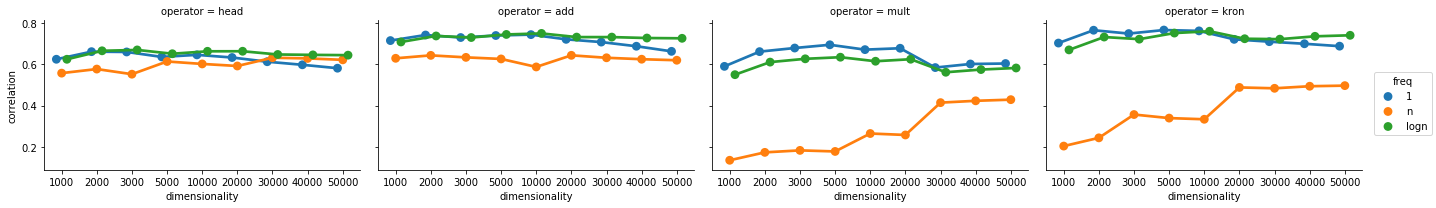

In [125]:
t.plot_interaction(heuristics_selection_collection_ks14[0], feature_ablation_ks14.index[1], 'KS14', ylabels=['correlation'])

In [126]:
assert feature_ablation_ks14.index[1] == 'freq'

r = heuristics_selection_collection_ks14[0]

heuristics_selection_collection_ks14[1] =  r.loc[
    (~((r['operator'] == 'head')) | (r['freq'] == 'logn')) &

    (~((r['operator'] == 'add') & (r['dimensionality'] < 5000)) | ((r['freq'] == '1'))) &
    (~((r['operator'] == 'add') & (r['dimensionality'] >= 5000)) | ((r['freq'] == 'logn'))) &

    (~((r['operator'] == 'mult')) | (r['freq'] == '1')) &
     
    (~((r['operator'] == 'kron') & (r['dimensionality'] < 10000)) | ((r['freq'] == '1'))) &
    (~((r['operator'] == 'kron') & (r['dimensionality'] >= 10000)) | ((r['freq'] == 'logn'))) &

    True
]

# t.plot_interaction(heuristics_selection_collection_ks14[1], feature_ablation_ks14.index[1], 'KS14')

In [127]:
assert feature_ablation_ks14.index[2] == 'operator'

In [128]:
_ = (
    heuristics_selection_collection_ks14[1]
    .set_index(['operator'] + parameters)['KS14']
    .unstack(['operator', 'cds', 'dimensionality'])
)
# _
# _.mean(axis=0)#.unstack('neg').max(axis=1)
(
    _.mean(axis=0).unstack('cds').apply(lambda c: _.mean(axis=0).unstack('cds').max(axis=1) - c, axis=0)
) > 0.07

cds                       0.75      1 global
operator dimensionality                     
add      1000             True   True  False
         2000            False  False  False
         3000             True  False  False
         5000            False  False  False
         10000           False  False  False
         20000           False  False  False
         30000           False  False  False
         40000           False  False  False
         50000           False  False  False
head     1000             True  False  False
         2000            False  False  False
         3000            False  False  False
         5000            False  False  False
         10000           False  False  False
         20000           False  False  False
         30000           False  False  False
         40000           False  False  False
         50000           False  False  False
kron     1000             True   True  False
         2000            False  False  False
         3000             True  False  False
         5000            False  False  False
         10000           False  False  False
         20000            True  False  False
         30000           False   True  False
         40000           False  False  False
         50000           False  False  False
mult     1000             True   True  False
         2000             True  False  False
         3000             True  False  False
         5000             True  False  False
         10000            True  False  False
         20000            True  False  False
         30000            True  False  False
         40000            True  False  False
         50000            True  False  False

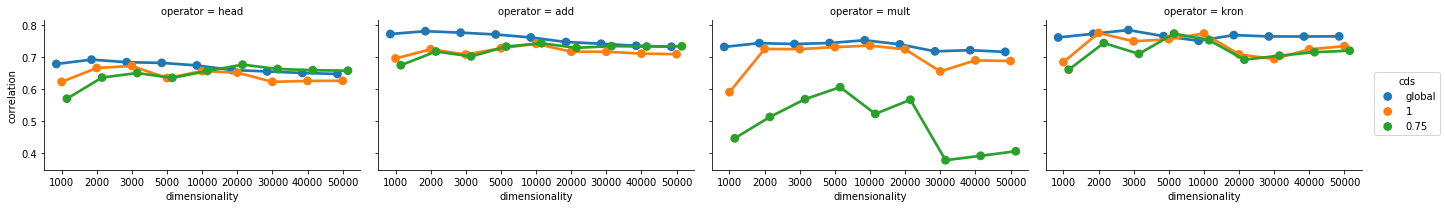

In [129]:
t.plot_interaction(heuristics_selection_collection_ks14[1], feature_ablation_ks14.index[3], 'KS14', ylabels=['correlation'])

In [130]:
assert feature_ablation_ks14.index[3] == 'cds'

r = heuristics_selection_collection_ks14[1]

heuristics_selection_collection_ks14[2] =  r.loc[
    (~((r['operator'] == 'head') & (r['dimensionality'] < 20000)) | ((r['cds'] == 'global'))) &
    (~((r['operator'] == 'head') & (r['dimensionality'] >= 20000)) | ((r['cds'] == '0.75'))) &

    (~((r['operator'] == 'add')) | (r['cds'] == 'global')) &
    (~((r['operator'] == 'mult')) | (r['cds'] == 'global')) &
    (~((r['operator'] == 'kron')) | (r['cds'] == 'global')) &

    True
]

# t.plot_interaction(heuristics_selection_collection_ks14[1], feature_ablation_ks14.index[1], 'KS14')

In [131]:
_ = (
    heuristics_selection_collection_ks14[2]
    .set_index(['operator'] + parameters)['KS14']
    .unstack(['operator', 'similarity', 'dimensionality'])
)
# _
# _.mean(axis=0)#.unstack('neg').max(axis=1)
(
    _.mean(axis=0).unstack('similarity').apply(lambda c: _.mean(axis=0).unstack('similarity').max(axis=1) - c, axis=0)
) > 0.07

similarity              correlation    cos inner_product
operator dimensionality                                 
add      1000                 False  False         False
         2000                 False  False         False
         3000                 False  False         False
         5000                 False  False         False
         10000                False  False         False
         20000                False  False         False
         30000                False  False          True
         40000                False  False          True
         50000                False  False          True
head     1000                 False  False         False
         2000                 False  False         False
         3000                 False  False         False
         5000                 False  False         False
         10000                False  False         False
         20000                False  False         False
         30000                False  False         False
         40000                False  False         False
         50000                False  False         False
kron     1000                 False  False         False
         2000                 False  False         False
         3000                 False  False         False
         5000                 False  False         False
         10000                False  False         False
         20000                False  False         False
         30000                False  False         False
         40000                False  False         False
         50000                False  False         False
mult     1000                 False  False         False
         2000                 False  False         False
         3000                 False  False         False
         5000                 False  False         False
         10000                False  False         False
         20000                False  False         False
         30000                False  False         False
         40000                False  False         False
         50000                False  False         False

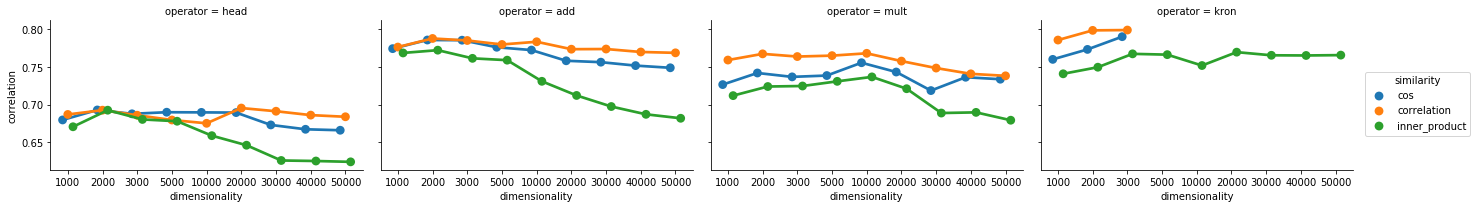

In [132]:
t.plot_interaction(heuristics_selection_collection_ks14[2], feature_ablation_ks14.index[4], 'KS14', ylabels=['correlation'])

In [133]:
assert feature_ablation_ks14.index[4] == 'similarity'

r = heuristics_selection_collection_ks14[2]

heuristics_selection_collection_ks14[3] =  r.loc[
    (~((r['operator'] == 'head') &  (r['dimensionality'] < 20000)) | (r['similarity'] == 'cos')) &
    (~((r['operator'] == 'head') &  (r['dimensionality'] >= 20000)) | (r['similarity'] == 'correlation')) &

    (~((r['operator'] == 'add')) | (r['similarity'] == 'correlation')) &

    (~((r['operator'] == 'mult')) | (r['similarity'] == 'correlation')) &

    (~((r['operator'] == 'kron') &  (r['dimensionality'] < 5000)) | (r['similarity'] == 'correlation')) &
    (~((r['operator'] == 'kron') &  (r['dimensionality'] >= 5000)) | (r['similarity'] == 'inner_product')) &

    True
]

# t.plot_interaction(heuristics_selection_collection_ks14[3], feature_ablation_ks14.index[4], 'KS14')

In [134]:
_ = (
    heuristics_selection_collection_ks14[3]
    .set_index(['operator'] + parameters)['KS14']
    .unstack(['operator', 'discr', 'dimensionality'])
)
# _
# _.mean(axis=0)#.unstack('neg').max(axis=1)
(
    _.mean(axis=0).unstack('discr').apply(lambda c: _.mean(axis=0).unstack('discr').max(axis=1) - c, axis=0)
) > 0.07

discr                    scpmi   spmi
operator dimensionality              
add      1000            False  False
         2000            False  False
         3000            False  False
         5000            False  False
         10000           False  False
         20000           False  False
         30000           False  False
         40000           False  False
         50000           False  False
head     1000            False  False
         2000            False  False
         3000            False  False
         5000            False  False
         10000           False  False
         20000           False  False
         30000           False  False
         40000           False  False
         50000           False  False
kron     1000            False  False
         2000            False  False
         3000            False  False
         5000            False  False
         10000           False  False
         20000           False  False
         30000           False  False
         40000           False  False
         50000           False  False
mult     1000            False  False
         2000            False  False
         3000            False  False
         5000            False  False
         10000           False  False
         20000           False  False
         30000           False  False
         40000           False  False
         50000           False  False

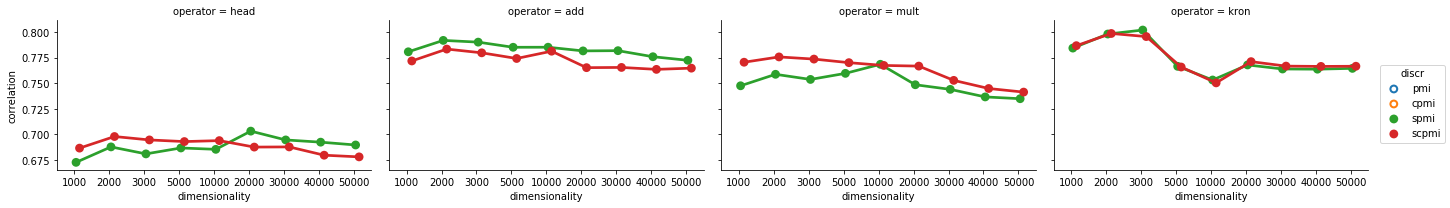

In [135]:
t.plot_interaction(heuristics_selection_collection_ks14[3], feature_ablation_ks14.index[5], 'KS14', ylabels=['correlation'])

In [136]:
assert feature_ablation_ks14.index[5] == 'discr'

r = heuristics_selection_collection_ks14[3]

heuristics_selection_collection_ks14[4] =  r.loc[
    (~((r['operator'] == 'head') & (r['dimensionality'] < 20000)) | (r['discr'] == 'scpmi')) &
    (~((r['operator'] == 'head') & (r['dimensionality'] >= 20000)) | (r['discr'] == 'spmi')) &

    (~((r['operator'] == 'add')) | (r['discr'] == 'spmi')) &

    (~((r['operator'] == 'mult')) | (r['discr'] == 'scpmi')) &

    (~((r['operator'] == 'kron') & (r['dimensionality'] < 20000)) | (r['discr'] == 'spmi')) &
    (~((r['operator'] == 'kron') & (r['dimensionality'] >= 20000)) | (r['discr'] == 'scpmi')) &

    True
]

# t.plot_interaction(heuristics_selection_collection_ks14[4], feature_ablation_ks14.index[5], 'KS14')

In [137]:
assert feature_ablation_ks14.index[6] == 'dimensionality'

In [138]:
assert len(feature_ablation_ks14) == 7

In [139]:
heuristics_selection_ks14 = heuristics_selection_collection_ks14[4].set_index(['operator', 'dimensionality'], drop=False)
heuristics_selection_ks14['selection'] = 'heuristics'
heuristics_selection_ks14.sort_index(inplace=True)

In [140]:
t.plot_selection(
    heuristics_selection_ks14,
    dataset='KS14',
    selector_function='heuristics',
    plot=False,
)

In [141]:
pd.concat(
    [
        max_selection_ks14.loc[
            ['head', '']
        ],        
        max_selection_ks14.loc[
            ['add', 'mult']
        ],
        max_selection_ks14.loc[
            ['kron', '']
        ],        
    ]
).round({'KS14': 2}).reset_index(drop=True).to_latex(
    'figures/ks14-max-selection.tex',
    columns=[
        'operator',
        'dimensionality',
        'KS14',
        'freq',
        'discr',
        'cds',
        'neg',
        'similarity',
    ],
    index=False,
    
)

In [142]:
pd.concat(
    [
        heuristics_selection_ks14.loc[
            ['head', '']
        ],        
        heuristics_selection_ks14.loc[
            ['add', 'mult']
        ],
        heuristics_selection_ks14.loc[
            ['kron', '']
        ],        
    ]
).round({'KS14': 2}).reset_index(drop=True).to_latex(
    'figures/ks14-heuristics-selection.tex',
    columns=[
        'operator',
        'dimensionality',
        'KS14',
        'freq',
        'discr',
        'cds',
        'neg',
        'similarity',
    ],
    index=False,
    
)

## GS11

In [143]:
'{:.2f}'.format(
    t.anova(
        response='GS11',
        predictors=compositional_parameters,
        data=results.loc[['add', 'head', 'mult', 'kron']],
    ).rsquared_adj
)

'0.75'

In [144]:
feature_ablation_gs11 = t.calculate_feature_ablation(
    responses=(
        'GS11',
    ),
    predictors=compositional_parameters,
    data=results.loc[['add', 'head', 'mult', 'kron']],
)

# feature_ablation.plot(kind='barh')#.get_figure().savefig('figures/emnlp2013_turk-parameter-ablation.pdf')
feature_ablation_gs11.sort_values(('partial R2', 'GS11'), ascending=False, inplace=True)

feature_ablation_gs11.round(2)

partial R2
response             GS11
predictor                
operator             0.37
freq                 0.21
neg                  0.18
similarity           0.09
cds                  0.05
discr                0.04
dimensionality       0.04

In [145]:
(
    feature_ablation_gs11['partial R2']
    .reset_index()
    .round({'GS11': 2})
    .to_latex('figures/gs11-ablation.tex', index=False)
)

In [146]:
heuristics_selection_collection_gs11 = {}

In [147]:
assert feature_ablation_gs11.index[0] == 'operator'

In [148]:
_ = (
    results.loc[['head', 'add', 'mult', 'kron'], ('max', 'GS11')]
    .unstack(['freq', 'operator', 'dimensionality'])
)
_
# _.mean(axis=0)#.unstack('neg').max(axis=1)
(
    _.mean(axis=0).unstack('freq').apply(lambda c: _.mean(axis=0).unstack('freq').max(axis=1) - c, axis=0)
) > 0.05

freq                         1   logn      n
operator dimensionality                     
add      1000            False  False   True
         2000            False  False   True
         3000            False  False   True
         5000            False  False   True
         10000           False  False   True
         20000            True  False   True
         30000            True  False   True
         40000            True  False  False
         50000            True  False  False
head     1000            False  False  False
         2000            False  False  False
         3000            False  False  False
         5000            False  False  False
         10000           False  False   True
         20000           False  False   True
         30000           False  False   True
         40000           False  False   True
         50000            True  False   True
kron     1000            False  False   True
         2000            False  False   True
         3000            False  False   True
         5000            False  False   True
         10000           False  False   True
         20000            True  False   True
         30000            True  False   True
         40000            True  False   True
         50000            True  False   True
mult     1000            False  False   True
         2000            False  False   True
         3000            False  False   True
         5000            False  False   True
         10000           False  False   True
         20000           False  False   True
         30000           False  False   True
         40000            True  False   True
         50000            True  False   True

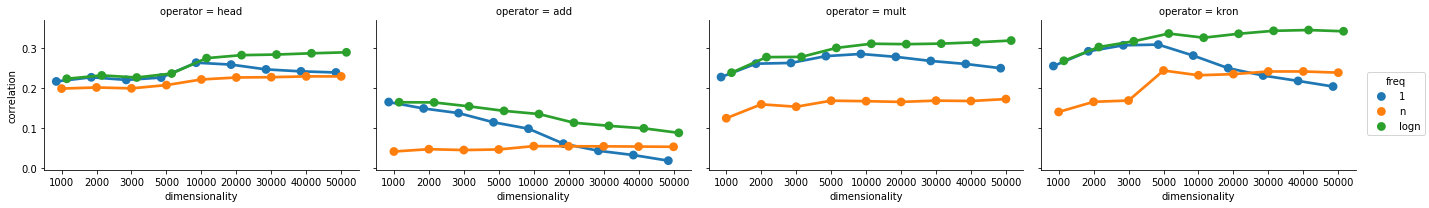

In [149]:
t.plot_interaction(results.loc[['add', 'head', 'mult', 'kron'], 'max'], feature_ablation_gs11.index[1], 'GS11', ylabels=['correlation'])

In [150]:
assert feature_ablation_gs11.index[1] == 'freq'

r = results.loc[['add', 'head', 'mult', 'kron'], 'max'].reset_index()

heuristics_selection_collection_gs11[0] =  r.loc[
    (r['freq'] == 'logn')
]

In [151]:
_ = (
    heuristics_selection_collection_gs11[0]
    .set_index(['operator'] + parameters)['GS11']
    .unstack(['neg', 'operator', 'dimensionality'])
)
_
# _.mean(axis=0)#.unstack('neg').max(axis=1)
(
    _.mean(axis=0).unstack('neg').apply(lambda c: _.mean(axis=0).unstack('neg').max(axis=1) - c, axis=0)
) > 0.05

neg                        0.2    0.5    0.7    1.0    1.4    2.0   5.0   7.0  \
operator dimensionality                                                         
add      1000            False  False  False   True   True   True  True  True   
         2000            False  False  False   True   True   True  True  True   
         3000            False  False  False   True   True   True  True  True   
         5000            False  False  False   True   True   True  True  True   
         10000           False  False  False   True   True   True  True  True   
         20000           False  False  False   True   True   True  True  True   
         30000           False  False  False   True   True   True  True  True   
         40000           False  False  False   True   True   True  True  True   
         50000           False  False  False   True   True   True  True  True   
head     1000            False  False  False   True   True   True  True  True   
         2000            False  False  False  False   True   True  True  True   
         3000            False  False  False  False   True   True  True  True   
         5000             True  False  False  False   True   True  True  True   
         10000            True  False  False  False  False   True  True  True   
         20000            True  False  False  False  False   True  True  True   
         30000            True  False  False  False  False   True  True  True   
         40000            True  False  False  False  False  False  True  True   
         50000            True  False  False  False  False  False  True  True   
kron     1000            False  False  False   True   True   True  True  True   
         2000            False  False  False   True   True   True  True  True   
         3000             True  False  False   True   True   True  True  True   
         5000             True  False  False  False   True   True  True  True   
         10000            True  False  False  False   True   True  True  True   
         20000            True   True  False  False   True   True  True  True   
         30000            True   True  False  False   True   True  True  True   
         40000            True   True  False  False   True   True  True  True   
         50000            True   True  False  False   True   True  True  True   
mult     1000            False  False   True   True   True   True  True  True   
         2000            False  False  False   True   True   True  True  True   
         3000            False  False  False   True   True   True  True  True   
         5000            False  False  False   True   True   True  True  True   
         10000           False  False  False   True   True   True  True  True   
         20000           False  False  False  False   True   True  True  True   
         30000           False  False  False  False   True   True  True  True   
         40000           False  False  False  False   True   True  True  True   
         50000           False  False  False  False   True   True  True  True   

neg                        N/A  
operator dimensionality         
add      1000            False  
         2000            False  
         3000            False  
         5000            False  
         10000           False  
         20000           False  
         30000           False  
         40000           False  
         50000           False  
head     1000            False  
         2000            False  
         3000            False  
         5000            False  
         10000            True  
         20000            True  
         30000            True  
         40000            True  
         50000            True  
kron     1000            False  
         2000            False  
         3000            False  
         5000             True  
         10000            True  
         20000            True  
         30000            True  
         40000            True

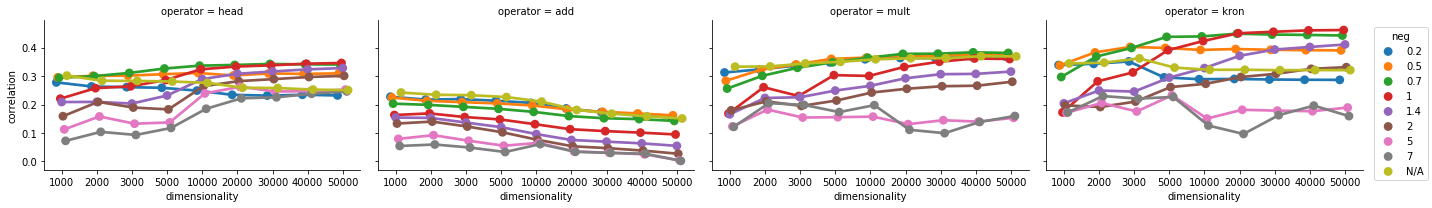

In [152]:
t.plot_interaction(heuristics_selection_collection_gs11[0], feature_ablation_gs11.index[2], 'GS11', ylabels=['correlation'])

In [153]:
assert feature_ablation_gs11.index[2] == 'neg'

r = heuristics_selection_collection_gs11[0]

heuristics_selection_collection_gs11[1] =  r.loc[
    (~((r['operator'] == 'head') & (r['dimensionality'] < 3000)) | ((r['neg'] == 0.5))) &
    (~((r['operator'] == 'head') & (r['dimensionality'] >= 3000)) | ((r['neg'] == 0.7))) &

    (~((r['operator'] == 'add') & (r['dimensionality'] < 20000)) | ((r['neg'] == 'N/A'))) &
    (~((r['operator'] == 'add') & (r['dimensionality'] >= 20000)) | ((r['neg'] == 0.2))) &

    (~((r['operator'] == 'mult') & (r['dimensionality'] < 5000)) | ((r['neg'] == 'N/A'))) &
    (~((r['operator'] == 'mult') & (r['dimensionality'] >= 5000)) | ((r['neg'] == 0.7))) &

    (~((r['operator'] == 'kron') & (r['dimensionality'] < 20000)) | ((r['neg'] == 0.7))) &
    (~((r['operator'] == 'kron') & (r['dimensionality'] >= 20000)) | ((r['neg'] == 1))) &

    True
]

# t.plot_interaction(heuristics_selection_collection_gs11[1], feature_ablation_gs11.index[2], 'GS11')

In [154]:
_ = (
    heuristics_selection_collection_gs11[1]
    .set_index(['operator'] + parameters)['GS11']
    .unstack(['similarity', 'operator', 'dimensionality'])
)
_
# _.mean(axis=0)#.unstack('neg').max(axis=1)
(
    _.mean(axis=0).unstack('similarity').apply(lambda c: _.mean(axis=0).unstack('similarity').max(axis=1) - c, axis=0)
) > 0.05

similarity              correlation    cos inner_product
operator dimensionality                                 
add      1000                 False  False          True
         2000                 False  False          True
         3000                 False  False          True
         5000                 False  False          True
         10000                False  False          True
         20000                False   True          True
         30000                False   True          True
         40000                False   True          True
         50000                False   True          True
head     1000                 False  False          True
         2000                 False  False          True
         3000                 False  False         False
         5000                 False  False         False
         10000                False  False         False
         20000                False  False         False
         30000                False  False         False
         40000                False  False         False
         50000                False  False         False
kron     1000                 False  False         False
         2000                 False  False         False
         3000                 False  False         False
         5000                 False  False         False
         10000                False  False         False
         20000                False  False         False
         30000                False  False         False
         40000                False  False         False
         50000                False  False         False
mult     1000                 False  False          True
         2000                 False  False          True
         3000                 False  False          True
         5000                 False  False          True
         10000                False  False          True
         20000                False  False          True
         30000                False  False          True
         40000                False  False          True
         50000                False  False          True

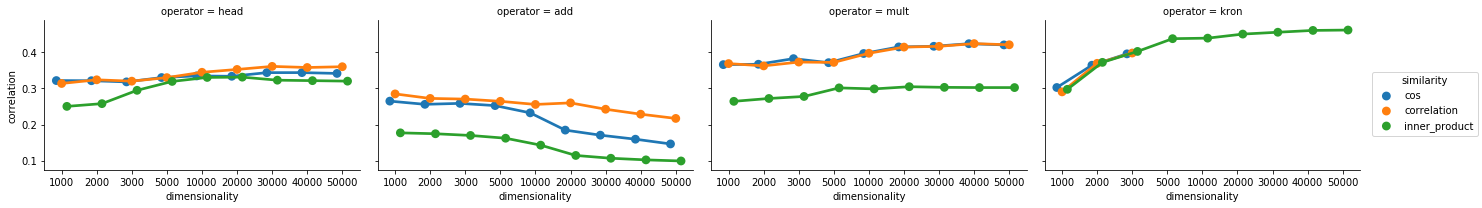

In [155]:
t.plot_interaction(heuristics_selection_collection_gs11[1], feature_ablation_gs11.index[3], 'GS11', ylabels=['correlation'])

In [156]:
assert feature_ablation_gs11.index[3] == 'similarity'

r = heuristics_selection_collection_gs11[1]

heuristics_selection_collection_gs11[2] =  r.loc[
    (~((r['operator'] == 'head')) | ((r['similarity'] == 'cos'))) &
    (~((r['operator'] == 'add')) | ((r['similarity'] == 'correlation'))) &
    (~((r['operator'] == 'mult')) | ((r['similarity'] == 'cos'))) &
    (~((r['operator'] == 'kron')) | ((r['similarity'] == 'inner_product'))) &

    True
]

# t.plot_interaction(heuristics_selection_collection_gs11[2], feature_ablation_gs11.index[3], 'GS11')

In [157]:
_ = (
    heuristics_selection_collection_gs11[2]
    .set_index(['operator'] + parameters)['GS11']
    .unstack(['cds', 'operator', 'dimensionality'])
)
_
# _.mean(axis=0)#.unstack('neg').max(axis=1)
(
    _.mean(axis=0).unstack('cds').apply(lambda c: _.mean(axis=0).unstack('cds').max(axis=1) - c, axis=0)
) > 0.05

cds                       0.75      1 global
operator dimensionality                     
add      1000            False  False  False
         2000            False  False  False
         3000            False  False  False
         5000            False  False  False
         10000           False  False  False
         20000           False  False  False
         30000           False  False  False
         40000           False  False  False
         50000           False  False  False
head     1000            False  False  False
         2000            False  False  False
         3000            False   True  False
         5000            False  False  False
         10000           False  False  False
         20000           False  False  False
         30000           False  False  False
         40000           False  False  False
         50000           False  False  False
kron     1000            False   True  False
         2000            False   True   True
         3000            False   True   True
         5000            False   True   True
         10000           False   True   True
         20000           False   True   True
         30000           False   True   True
         40000           False   True   True
         50000           False   True   True
mult     1000             True   True  False
         2000             True   True  False
         3000             True   True  False
         5000             True   True  False
         10000            True   True  False
         20000            True  False  False
         30000            True  False  False
         40000            True  False  False
         50000            True  False  False

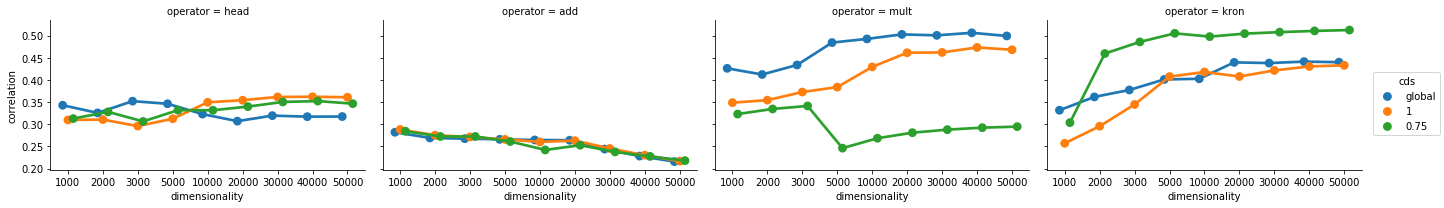

In [158]:
t.plot_interaction(heuristics_selection_collection_gs11[2], feature_ablation_gs11.index[4], 'GS11', ylabels=['correlation'])

In [159]:
assert feature_ablation_gs11.index[4] == 'cds'

r = heuristics_selection_collection_gs11[2]

heuristics_selection_collection_gs11[3] =  r.loc[
    (~((r['operator'] == 'head') & (r['dimensionality'] < 10000)) | ((r['cds'] == 'global'))) &
    (~((r['operator'] == 'head') & (r['dimensionality'] >= 10000)) | ((r['cds'] == '1'))) &

    (~((r['operator'] == 'add') & (r['dimensionality'] < 20000)) | ((r['cds'] == '1'))) &
    (~((r['operator'] == 'add') & (r['dimensionality'] >= 20000)) | ((r['cds'] == '0.75'))) &

    (~((r['operator'] == 'mult')) | ((r['cds'] == 'global'))) &

    (~((r['operator'] == 'kron')) | ((r['cds'] == '0.75'))) &

    True
]

# t.plot_interaction(heuristics_selection_collection_gs11[3], feature_ablation_gs11.index[4], 'GS11')

In [160]:
_ = (
    heuristics_selection_collection_gs11[3]
    .set_index(['operator'] + parameters)['GS11']
    .unstack(['discr', 'operator', 'dimensionality'])
)
_
# _.mean(axis=0)#.unstack('neg').max(axis=1)
(
    _.mean(axis=0).unstack('discr').apply(lambda c: _.mean(axis=0).unstack('discr').max(axis=1) - c, axis=0)
).loc['kron'] > 0.05

discr            cpmi    pmi  scpmi   spmi
dimensionality                            
1000            False  False  False   True
2000            False  False  False   True
3000            False  False  False  False
5000            False  False  False  False
10000           False  False  False  False
20000           False  False  False  False
30000           False  False  False  False
40000           False  False  False  False
50000           False  False  False  False

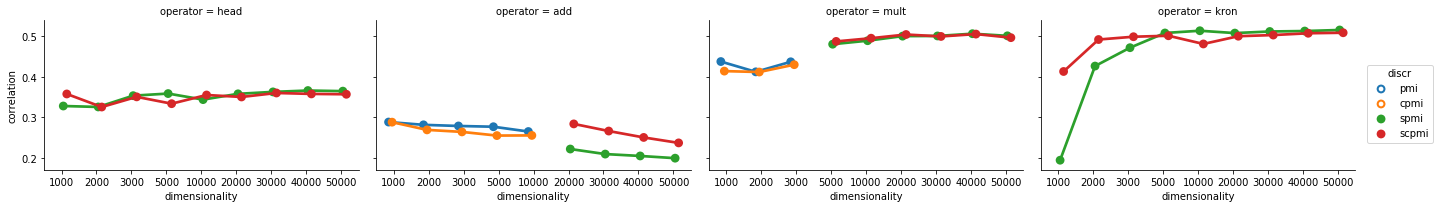

In [161]:
t.plot_interaction(heuristics_selection_collection_gs11[3], feature_ablation_gs11.index[5], 'GS11', ylabels=['correlation'])

In [162]:
assert feature_ablation_gs11.index[5] == 'discr'

r = heuristics_selection_collection_gs11[3]

heuristics_selection_collection_gs11[4] =  r.loc[
    (~((r['operator'] == 'head')) | ((r['discr'] == 'spmi'))) &

    (~((r['operator'] == 'add') & (r['dimensionality'] < 20000)) | ((r['discr'] == 'pmi'))) &
    (~((r['operator'] == 'add') & (r['dimensionality'] >= 20000)) | ((r['discr'] == 'scpmi'))) &

    (~((r['operator'] == 'mult') & (r['dimensionality'] < 5000)) | ((r['discr'] == 'pmi'))) &
    (~((r['operator'] == 'mult') & (r['dimensionality'] >= 5000)) | ((r['discr'] == 'scpmi'))) &

    (~((r['operator'] == 'kron') & (r['dimensionality'] < 5000)) | ((r['discr'] == 'scpmi'))) &
    (~((r['operator'] == 'kron') & (r['dimensionality'] >= 5000)) | ((r['discr'] == 'spmi'))) &

    True
]

# t.plot_interaction(heuristics_selection_collection_gs11[4], feature_ablation_gs11.index[5], 'GS11')

In [163]:
assert feature_ablation_gs11.index[6] == 'dimensionality'

In [164]:
assert len(feature_ablation_gs11) == 7

In [165]:
heuristics_selection_gs11 = heuristics_selection_collection_gs11[4].set_index(['operator', 'dimensionality'], drop=False)
heuristics_selection_gs11['selection'] = 'heuristics'
heuristics_selection_gs11.sort_index(inplace=True)

In [166]:
t.plot_selection(
    heuristics_selection_gs11,
    dataset='GS11',
    selector_function='heuristics',
    plot=False,
)

##  Phraserel

In [167]:
'{:.2f}'.format(
    t.anova(
        response='PhraseRel',
        predictors=compositional_parameters,
        data=results.loc[['add', 'head', 'mult', 'kron']],
    ).rsquared_adj
)

'0.82'

In [168]:
feature_ablation_phraserel = t.calculate_feature_ablation(
    responses=(
        'PhraseRel',
    ),
    predictors=compositional_parameters,
    data=results.loc[['add', 'head', 'mult', 'kron']],
)

# feature_ablation.plot(kind='barh')#.get_figure().savefig('figures/emnlp2013_turk-parameter-ablation.pdf')
feature_ablation_phraserel.sort_values(('partial R2', 'PhraseRel'), ascending=False, inplace=True)

feature_ablation_phraserel.round(2)

partial R2
response        PhraseRel
predictor                
neg                  0.58
operator             0.35
cds                  0.08
freq                 0.04
similarity           0.03
dimensionality       0.03
discr                0.02

In [169]:
(
    feature_ablation_phraserel['partial R2']
    .reset_index()
    .round({'PhraseRel': 2})
    .to_latex('figures/phraserel-ablation.tex', index=False)
)

In [170]:
heuristics_selection_collection_phraserel = {}

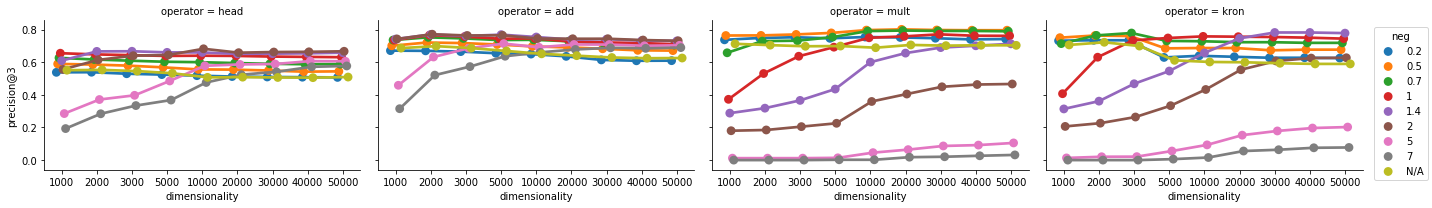

In [171]:
t.plot_interaction(results.loc[['add', 'head', 'mult', 'kron'], 'max'], feature_ablation_phraserel.index[0], 'PhraseRel', ylabels=['precision@3'])

In [172]:
assert feature_ablation_phraserel.index[0] == 'neg'

r = results.loc[['add', 'head', 'mult', 'kron'], 'max'].reset_index()

heuristics_selection_collection_phraserel[0] =  r.loc[
    (~((r['operator'] == 'head')) | ((r['neg'] == 1.4))) &
    (~((r['operator'] == 'add')) | ((r['neg'] == 2))) &
    (~((r['operator'] == 'mult')) | ((r['neg'] == 0.5))) &

    (~(((r['operator'] == 'kron') & (r['dimensionality'] < 5000))) | ((r['neg'] == 0.5))) &
    (~(((r['operator'] == 'kron') & (r['dimensionality'] >= 5000) & (r['dimensionality'] < 20000))) | ((r['neg'] == 1))) &
    (~(((r['operator'] == 'kron') & (r['dimensionality'] >= 20000))) | ((r['neg'] == 1.4))) &

    True
]

In [173]:
assert feature_ablation_phraserel.index[1] == 'operator'

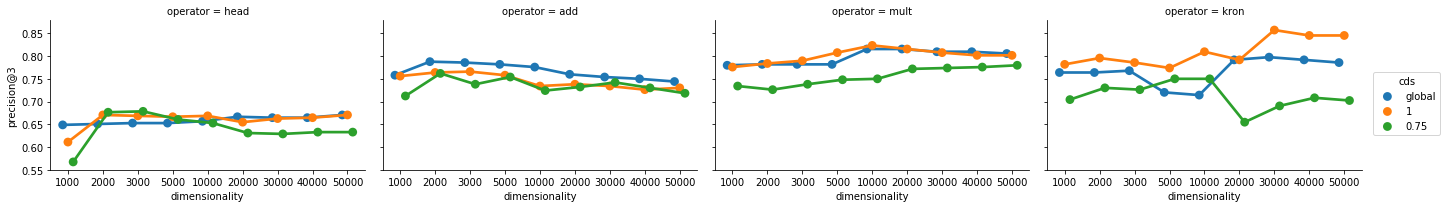

In [174]:
t.plot_interaction(heuristics_selection_collection_phraserel[0], feature_ablation_phraserel.index[2], 'PhraseRel', ylabels=['precision@3'])

In [175]:
assert feature_ablation_phraserel.index[2] == 'cds'

r = heuristics_selection_collection_phraserel[0]

heuristics_selection_collection_phraserel[1] =  r.loc[
    (~(((r['operator'] == 'head') & (r['dimensionality'] < 10000))) | ((r['cds'] == '0.75'))) &
    (~(((r['operator'] == 'head') & (r['dimensionality'] >= 10000))) | ((r['cds'] == 'global'))) &

    (~((r['operator'] == 'add')) | ((r['cds'] == 'global'))) &
    (~((r['operator'] == 'mult')) | ((r['cds'] == 'global'))) &
    (~((r['operator'] == 'kron')) | ((r['cds'] == '1'))) &

    True
]

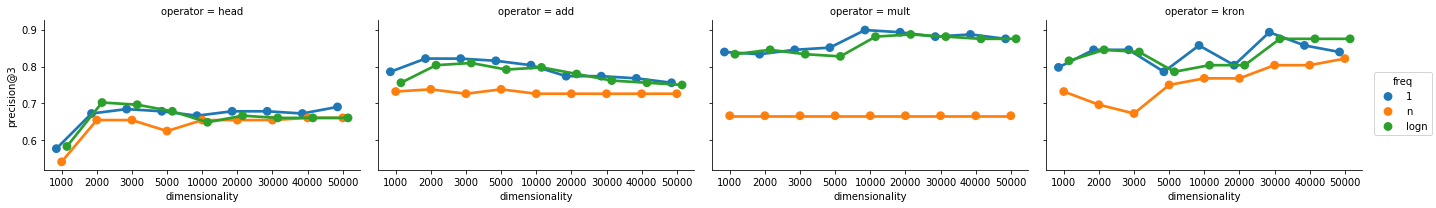

In [176]:
t.plot_interaction(heuristics_selection_collection_phraserel[1], feature_ablation_phraserel.index[3], 'PhraseRel', ylabels=['precision@3'])

In [177]:
assert feature_ablation_phraserel.index[3] == 'freq'

r = heuristics_selection_collection_phraserel[1]

heuristics_selection_collection_phraserel[2] =  r.loc[
    (~((r['operator'] == 'head')) | ((r['freq'] == 'n'))) &
    (~((r['operator'] == 'add')) | ((r['freq'] == '1'))) &
    (~((r['operator'] == 'mult')) | ((r['freq'] == 'logn'))) &

    (~(((r['operator'] == 'kron') & (r['dimensionality'] < 5000))) | ((r['freq'] == 'logn'))) &
    (~(((r['operator'] == 'kron') & (r['dimensionality'] >= 5000))) | ((r['freq'] == '1'))) &

    True
]

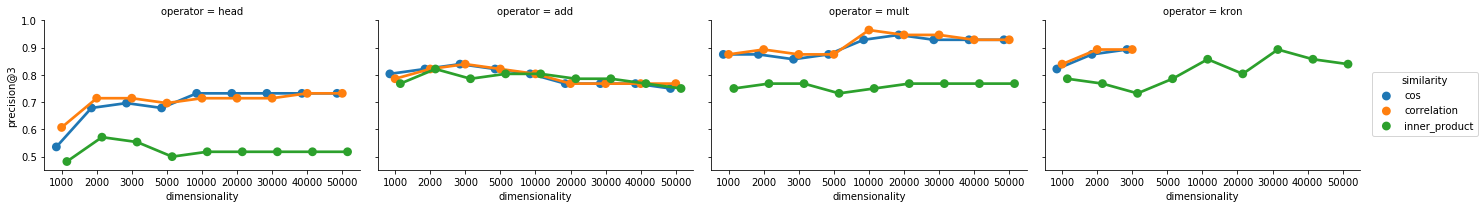

In [178]:
t.plot_interaction(heuristics_selection_collection_phraserel[2], feature_ablation_phraserel.index[4], 'PhraseRel', ylabels=['precision@3'])

In [179]:
assert feature_ablation_phraserel.index[4] == 'similarity'

r = heuristics_selection_collection_phraserel[2]

heuristics_selection_collection_phraserel[3] =  r.loc[
    (~(((r['operator'] == 'head') & (r['dimensionality'] < 10000))) | ((r['similarity'] == 'correlation'))) &
    (~(((r['operator'] == 'head') & (r['dimensionality'] >= 10000))) | ((r['similarity'] == 'cos'))) &

    (~(((r['operator'] == 'add') & (r['dimensionality'] < 20000))) | ((r['similarity'] == 'cos'))) &
    (~(((r['operator'] == 'add') & (r['dimensionality'] >= 20000))) | ((r['similarity'] == 'inner_product'))) &

    (~((r['operator'] == 'mult')) | ((r['similarity'] == 'correlation'))) &

    (~(((r['operator'] == 'kron') & (r['dimensionality'] < 5000))) | ((r['similarity'] == 'correlation'))) &
    (~(((r['operator'] == 'kron') & (r['dimensionality'] >= 5000))) | ((r['similarity'] == 'inner_product'))) &

    True
]

In [180]:
assert feature_ablation_phraserel.index[5] == 'dimensionality'

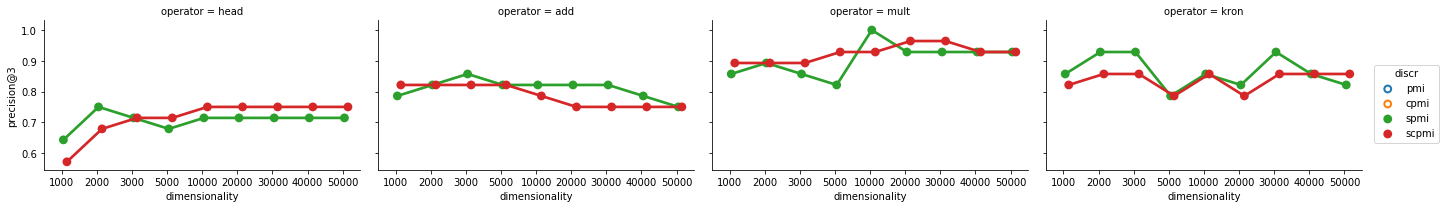

In [181]:
t.plot_interaction(heuristics_selection_collection_phraserel[3], feature_ablation_phraserel.index[6], 'PhraseRel', ylabels=['precision@3'])

In [182]:
assert feature_ablation_phraserel.index[6] == 'discr'

r = heuristics_selection_collection_phraserel[3]

heuristics_selection_collection_phraserel[4] =  r.loc[
    (~(((r['operator'] == 'head') & (r['dimensionality'] < 5000))) | ((r['discr'] == 'spmi'))) &
    (~(((r['operator'] == 'head') & (r['dimensionality'] >= 5000))) | ((r['discr'] == 'scpmi'))) &

    (~((r['operator'] == 'add')) | ((r['discr'] == 'spmi'))) &
    (~((r['operator'] == 'mult')) | ((r['discr'] == 'scpmi'))) &
    (~((r['operator'] == 'kron')) | ((r['discr'] == 'spmi'))) &

    True
]

In [183]:
assert len(feature_ablation_phraserel) == 7

In [184]:
heuristics_selection_phraserel = heuristics_selection_collection_phraserel[4].set_index(['operator', 'dimensionality'], drop=False)
heuristics_selection_phraserel['selection'] = 'heuristics'
heuristics_selection_phraserel.sort_index(inplace=True)

## Compositional comparison 

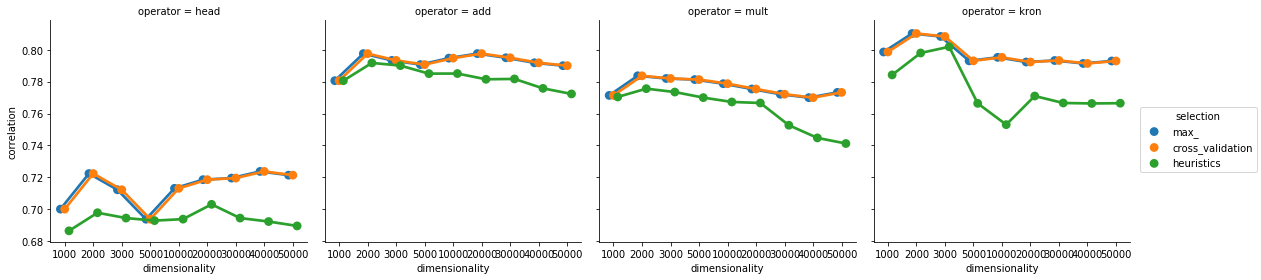

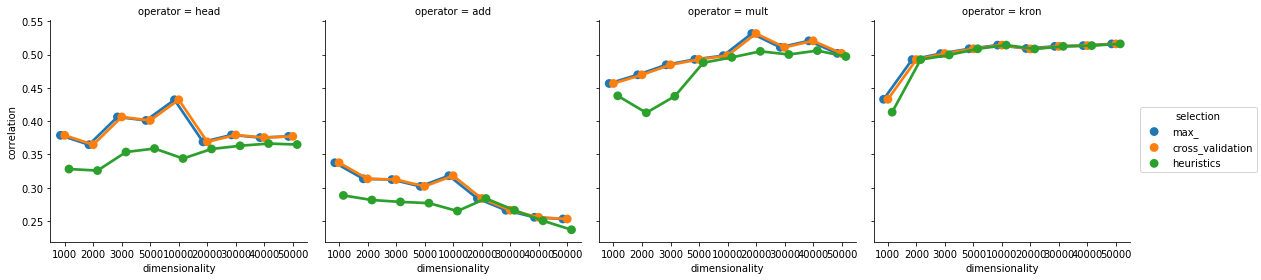

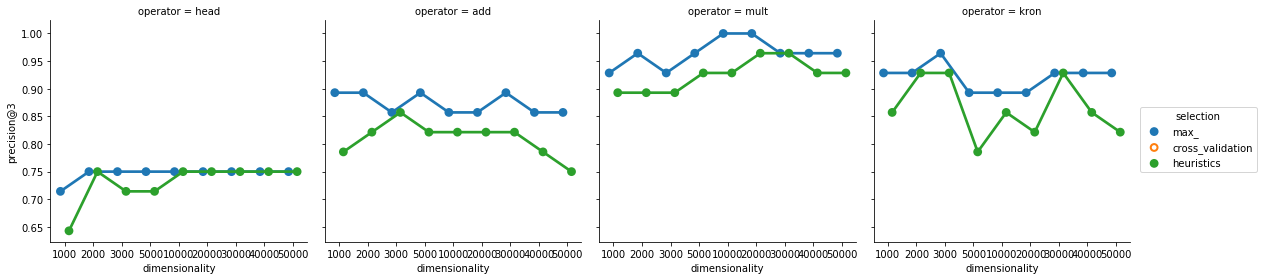

In [185]:
t.plot_parameter_selection_comparison(
    [
        max_selection_ks14,
        cross_validation_selection_ks14,
        heuristics_selection_ks14,
    ],
    'KS14',
    col='operator',
    ylabel='correlation'
).fig.savefig('figures/ks14-results.pdf')
    
t.plot_parameter_selection_comparison(
    [
        max_selection_gs11,
        cross_validation_selection_gs11,
        heuristics_selection_gs11,
    ],
    'GS11',
    col='operator',
    ylabel='correlation'
).fig.savefig('figures/gs11-results.pdf')

t.plot_parameter_selection_comparison(
    [
        max_selection_phraserel,
        #cross_validation_selection_phraserel,
        heuristics_selection_phraserel,
    ],
    'PhraseRel',
    col='operator',
    ylabel='precision@3'
).fig.savefig('figures/phraserel-results.pdf')

In [186]:
pd.concat(
    [
        max_selection_gs11.loc[
            ['head']
        ],        
        max_selection_gs11.loc[
            ['add', 'mult']
        ],
        max_selection_gs11.loc[
            ['kron']
        ],        
    ]
).round({'GS11': 2}).reset_index(drop=True).to_latex(
    'figures/gs11-max-selection.tex',
    columns=[
        'operator',
        'dimensionality',
        'GS11',
        'freq',
        'discr',
        'cds',
        'neg',
        'similarity',
    ],
    index=False,
)

In [187]:
pd.concat(
    [
        heuristics_selection_gs11.loc[
            ['head', '']
        ],        
        heuristics_selection_gs11.loc[
            ['add', 'mult']
        ],
        heuristics_selection_gs11.loc[
            ['kron', '']
        ],        
    ]
).round({'GS11': 2}).reset_index(drop=True).to_latex(
    'figures/gs11-heuristics-selection.tex',
    columns=[
        'operator',
        'dimensionality',
        'GS11',
        'freq',
        'discr',
        'cds',
        'neg',
        'similarity',
    ],
    index=False,
)

In [188]:
pd.concat(
    [
        max_selection_phraserel.loc[
            ['head']
        ],        
        max_selection_phraserel.loc[
            ['add', 'mult']
        ],
        max_selection_phraserel.loc[
            ['kron']
        ],        
    ]
).round({'PhraseRel': 2}).reset_index(drop=True).to_latex(
    'figures/phraserel-max-selection.tex',
    columns=[
        'operator',
        'dimensionality',
        'PhraseRel',
        'freq',
        'discr',
        'cds',
        'neg',
        'similarity',
    ],
    index=False,
)

In [189]:
pd.concat(
    [
        heuristics_selection_phraserel.loc[
            ['head', '']
        ],        
        heuristics_selection_phraserel.loc[
            ['add', 'mult']
        ],
        heuristics_selection_phraserel.loc[
            ['kron', '']
        ],        
    ]
).round({'PhraseRel': 2}).reset_index(drop=True).to_latex(
    'figures/phraserel-heuristics-selection.tex',
    columns=[
        'operator',
        'dimensionality',
        'PhraseRel',
        'freq',
        'discr',
        'cds',
        'neg',
        'similarity',
    ],
    index=False,
)

In [190]:
dataset_mapping = {
    'KS14': [
        max_selection_ks14,
        cross_validation_selection_ks14,
        heuristics_selection_ks14,
    ],
    'GS11': [
        max_selection_gs11,
        cross_validation_selection_gs11,
        heuristics_selection_gs11,
    ],
    'PhraseRel': [
        max_selection_phraserel,
        #cross_validation_selection_phraserel,
        heuristics_selection_phraserel,
    ],
}

In [191]:
for dataset in 'KS14', 'GS11', 'PhraseRel':
    print(
        '{dataset}: {:.2f}'.format(
            t.average_error(
                dataset_mapping[dataset][0],
                dataset_mapping[dataset][-1],
                dataset,
            ),
            dataset=dataset,
        )
    )
    for operator in 'head', 'add', 'mult', 'kron':
        print(
            '{dataset}, {operator}: {:.2f}'.format(
                t.average_error(
                    dataset_mapping[dataset][0].loc[operator],
                    dataset_mapping[dataset][-1].loc[operator],
                    dataset,
                ),
                operator=operator,
                dataset=dataset,
            )
        )

KS14: 0.02
KS14, head: 0.03
KS14, add: 0.01
KS14, mult: 0.02
KS14, kron: 0.03
GS11: 0.05
GS11, head: 0.09
GS11, add: 0.08
GS11, mult: 0.04
GS11, kron: 0.01
PhraseRel: 0.05
PhraseRel, head: 0.02
PhraseRel, add: 0.07
PhraseRel, mult: 0.04
PhraseRel, kron: 0.06


In [192]:
for from_i, from_ in enumerate(('KS14', 'GS11', 'PhraseRel')):
    for to_i, to_ in enumerate(t for t in ('KS14', 'GS11', 'PhraseRel') if t != from_):
        for method_i, method in (0, 'max'), (-1, 'heuristics'):
            print(
                '{from_} -> {to_}, {method}: {:.2f}'.format(
                    t.average_error(
                        dataset_mapping[to_][0].loc[['head', 'add', 'mult', 'kron']],
                        dataset_mapping[from_][method_i].loc[['head', 'add', 'mult', 'kron']],
                        to_,
                    ),
                    from_=from_,
                    to_=to_,
                    method=method,
                )
            )

KS14 -> GS11, max: 0.34
KS14 -> GS11, heuristics: 0.24
KS14 -> PhraseRel, max: 0.09
KS14 -> PhraseRel, heuristics: 0.09
GS11 -> KS14, max: 0.12
GS11 -> KS14, heuristics: 0.11
GS11 -> PhraseRel, max: 0.13
GS11 -> PhraseRel, heuristics: 0.12
PhraseRel -> KS14, max: 0.15
PhraseRel -> KS14, heuristics: 0.14
PhraseRel -> GS11, max: 0.46
PhraseRel -> GS11, heuristics: 0.51


In [193]:
print(
    '{:.2f}'.format(
        t.average_error(
            max_selection_gs11.loc[['head', 'add', 'mult', 'kron']],
            heuristics_selection_ks14.loc[['head', 'add', 'mult', 'kron']],
            'GS11',
        ),
    )
)

0.24


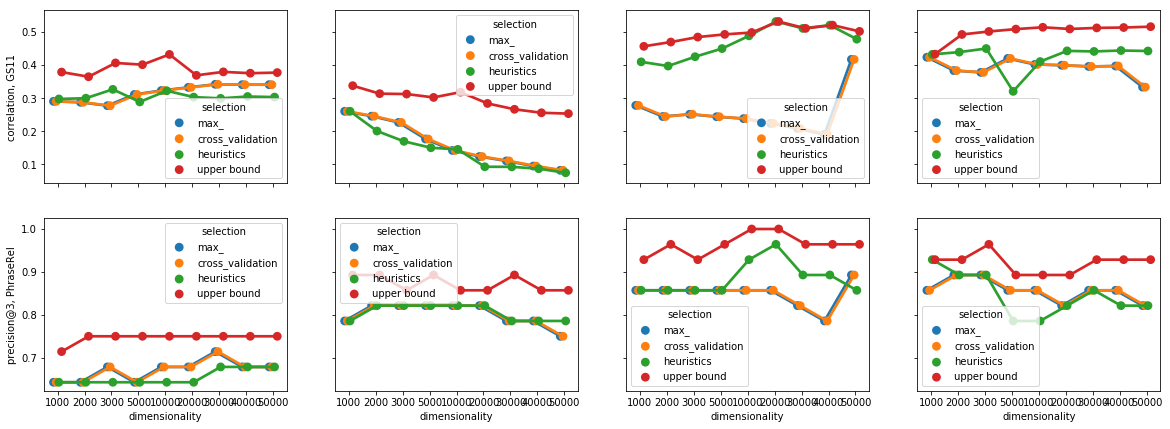

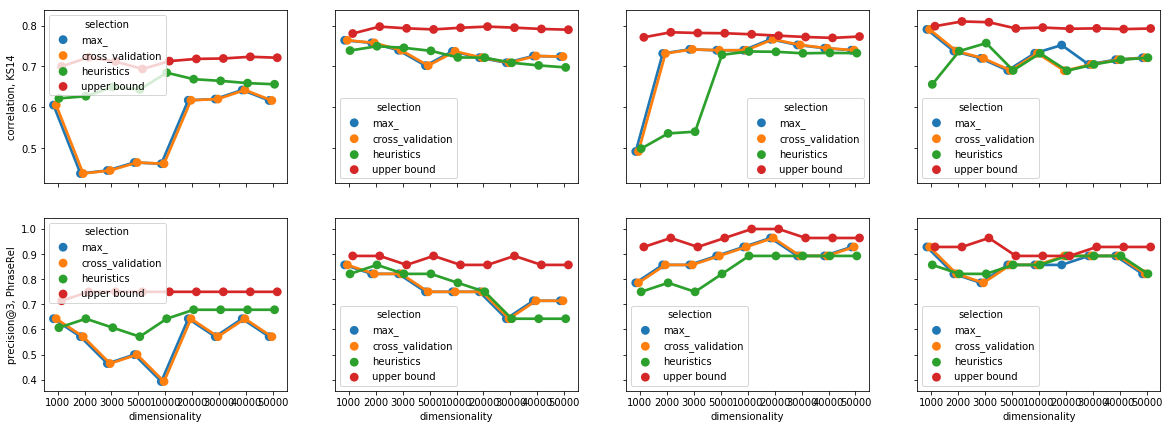

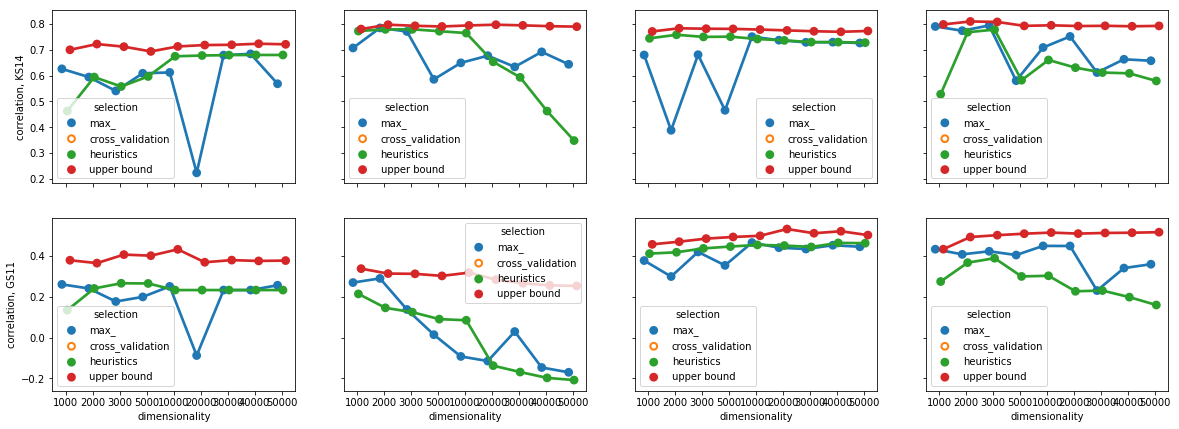

In [194]:
for from_i, from_ in enumerate(
    (
        'KS14',
        'GS11',
        'PhraseRel',
    )
):

    f, axarr = plt.subplots(
        2, 4,
        sharex=True,
        sharey='row',
        figsize=(2 * 10, 2 * 3.5),
    )

    ylabels = {'KS14': 'correlation', 'GS11': 'correlation', 'PhraseRel': 'precision@3'}
    for to_i, to_ in enumerate(t for t in ('KS14', 'GS11', 'PhraseRel') if t != from_):
        for operator_i, operator in enumerate(('head', 'add', 'mult', 'kron')):

            t.plot_parameter_selection_comparison(
                (
                    dataset_mapping[from_] +
                    [dataset_mapping[to_][0].assign(selection='upper bound')]
                ),
                from_,
                to_,
                ax=axarr[to_i, operator_i],
                operator=operator,
                ylabel='{}, {}'.format(ylabels[to_], to_) if operator_i == 0 else '',
                xlabel='' if to_i == 0 else None,
            )
            
#         if operator_i == 0:
#             axarr[to_i, operator_i].set(ylabel=ylabels[to_i])
        
    f.savefig('figures/{from_}-transfer.pdf'.format(from_=from_))

# Compositional

In [195]:
results['max', 'compositional'] = (
    (
        (results['max', 'KS14'] / results['max', 'KS14'].max()) +
        (results['max', 'GS11'] / results['max', 'GS11'].max()) +
        (results['max', 'PhraseRel'] / results['max', 'PhraseRel'].max())
    ) / 3
)

In [196]:
max_selection_compositional = t.plot_selection(
    results[
        results['max', 'KS14'].notnull() &
        results['max', 'GS11'].notnull()
    ],
    dataset='compositional',
    selector_function=t.max_('KS14', 'GS11', 'PhraseRel'),
    plot=False,
)

In [197]:
pd.concat(
    [
        max_selection_compositional.loc[
            ['head']
        ],        
        max_selection_compositional.loc[
            ['add', 'mult']
        ],
        max_selection_compositional.loc[
            ['kron']
        ],        
    ]
).round({'KS14': 2, 'GS11': 2, 'PhraseRel': 2, 'compositional': 2}).reset_index(drop=True).to_latex(
    'figures/compositional-max-selection.tex',
    columns=[
        'operator',
        'dimensionality',
        'KS14',
        'GS11',
        'PhraseRel',
        'compositional',
        'freq',
        'discr',
        'cds',
        'neg',
        'similarity',
    ],
    index=False,
)

In [198]:
'{:.2f}'.format(
    t.anova(
        response='compositional',
        predictors=compositional_parameters,
        data=results.loc[['add', 'head', 'mult', 'kron']],
    ).rsquared_adj
)

'0.77'

In [199]:
feature_ablation_compositional = t.calculate_feature_ablation(
    responses=(
        'compositional',
    ),
    predictors=compositional_parameters,
    data=results.loc[['add', 'head', 'mult', 'kron']],
)

# feature_ablation.plot(kind='barh')#.get_figure().savefig('figures/emnlp2013_turk-parameter-ablation.pdf')
feature_ablation_compositional.sort_values(('partial R2', 'compositional'), ascending=False, inplace=True)

feature_ablation_compositional.round(2)

partial R2
response       compositional
predictor                   
neg                     0.40
freq                    0.29
operator                0.21
cds                     0.15
similarity              0.08
discr                   0.06
dimensionality          0.05

In [200]:
(
    feature_ablation_compositional['partial R2']
    .reset_index()
    .round({'compositional': 2})
    .to_latex('figures/compositional-ablation.tex', index=False)
)

In [201]:
_ = (
    results.loc[['head', 'add', 'mult', 'kron'], ('max', 'compositional')]
    .unstack(['neg', 'operator', 'dimensionality'])
)
_
# _.mean(axis=0)#.unstack('neg').max(axis=1)
(
    _.mean(axis=0).unstack('neg').apply(lambda c: _.mean(axis=0).unstack('neg').max(axis=1) - c, axis=0)
) > 0.14

neg                        0.2    0.5    0.7    1.0    1.4    2.0    5.0  \
operator dimensionality                                                    
add      1000            False  False  False  False  False  False   True   
         2000            False  False  False  False  False  False  False   
         3000            False  False  False  False  False  False  False   
         5000            False  False  False  False  False  False  False   
         10000           False  False  False  False  False  False  False   
         20000           False  False  False  False  False  False  False   
         30000           False  False  False  False  False  False  False   
         40000           False  False  False  False  False  False  False   
         50000           False  False  False  False  False  False  False   
head     1000            False  False  False  False  False   True   True   
         2000            False  False  False  False  False  False   True   
         3000            False  False  False  False  False  False   True   
         5000             True  False  False  False  False  False   True   
         10000            True  False  False  False  False  False  False   
         20000            True  False  False  False  False  False  False   
         30000            True  False  False  False  False  False  False   
         40000            True  False  False  False  False  False  False   
         50000            True  False  False  False  False  False  False   
kron     1000            False  False  False   True   True   True   True   
         2000            False  False  False  False   True   True   True   
         3000            False  False  False  False   True   True   True   
         5000             True  False  False  False   True   True   True   
         10000            True  False  False  False  False   True   True   
         20000            True  False  False  False  False   True   True   
         30000            True  False  False  False  False   True   True   
         40000            True  False  False  False  False   True   True   
         50000            True  False  False  False  False   True   True   
mult     1000            False  False  False   True   True   True   True   
         2000            False  False  False   True   True   True   True   
         3000            False  False  False   True   True   True   True   
         5000            False  False  False  False   True   True   True   
         10000           False  False  False  False   True   True   True   
         20000           False  False  False  False  False   True   True   
         30000           False  False  False  False  False   True   True   
         40000           False  False  False  False  False   True   True   
         50000           False  False  False  False  False   True   True   

neg                        7.0    N/A  
operator dimensionality                
add      1000             True  False  
         2000             True  False  
         3000             True  False  
         5000            False  False  
         10000           False  False  
         20000           False  False  
         30000           False  False  
         40000           False  False  
         50000           False  False  
head     1000             True  False  
         2000             True  False  
         3000             True  False  
         5000             True  False  
         10000            True   True  
         20000            True   True  
         30000            True   True  
         40000           False   True  
         50000           False   True  
kron     1000             True  False  
         2000             True  False  
         3000             True  False  
         5000            False   True  
         10000            True   True  
         20000            True   True  
         30000            True   True  
         40000            True 

In [202]:
heuristics_selection_collection_compositional = {}

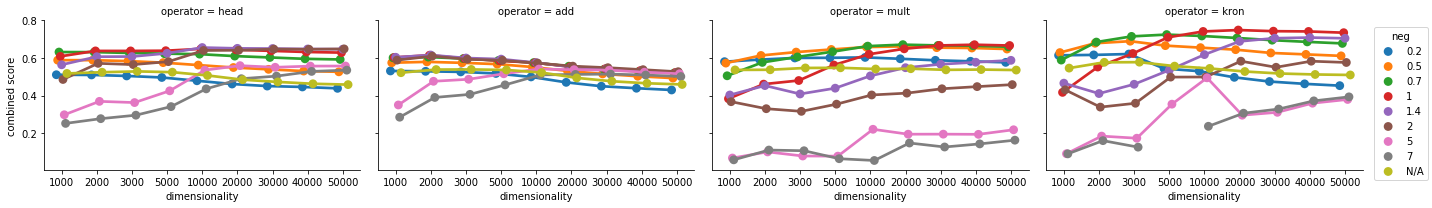

In [203]:
t.plot_interaction(results.loc[['add', 'head', 'mult', 'kron'], 'max'], feature_ablation_compositional.index[0], 'compositional', ylabels=['combined score'])

In [204]:
assert feature_ablation_compositional.index[0] == 'neg'

r = results.loc[['add', 'head', 'mult', 'kron'], 'max'].reset_index()

heuristics_selection_collection_compositional[0] =  r.loc[
    (~(((r['operator'] == 'head') & (r['dimensionality'] < 10000))) | ((r['neg'] == 1))) &
    (~(((r['operator'] == 'head') & (r['dimensionality'] >= 10000))) | ((r['neg'] == 1.4))) &

    (~((r['operator'] == 'add')) | ((r['neg'] == 1))) &

    (~(((r['operator'] == 'mult') & (r['dimensionality'] < 10000))) | ((r['neg'] == 0.5))) &
    (~(((r['operator'] == 'mult') & (r['dimensionality'] >= 10000))) | ((r['neg'] == 0.7))) &

    (~(((r['operator'] == 'kron') & (r['dimensionality'] < 10000))) | ((r['neg'] == 0.7))) &
    (~(((r['operator'] == 'kron') & (r['dimensionality'] >= 10000))) | ((r['neg'] == 1))) &

    True
]

In [205]:
_ = (
    heuristics_selection_collection_compositional[0]
    .set_index(['operator'] + parameters)['compositional']
    .unstack(['freq', 'operator', 'dimensionality'])
)
_
# _.mean(axis=0)#.unstack('neg').max(axis=1)
(
    _.mean(axis=0).unstack('freq').apply(lambda c: _.mean(axis=0).unstack('freq').max(axis=1) - c, axis=0)
) > 0.14

freq                         1   logn      n
operator dimensionality                     
add      1000            False  False   True
         2000            False  False   True
         3000            False  False   True
         5000            False  False   True
         10000           False  False   True
         20000           False  False   True
         30000           False  False   True
         40000           False  False   True
         50000           False  False   True
head     1000            False  False  False
         2000            False  False  False
         3000            False  False  False
         5000            False  False  False
         10000           False  False  False
         20000           False  False  False
         30000           False  False  False
         40000           False  False  False
         50000           False  False  False
kron     1000            False  False   True
         2000            False  False   True
         3000            False  False   True
         5000            False  False   True
         10000           False  False   True
         20000           False  False   True
         30000           False  False   True
         40000           False  False   True
         50000           False  False   True
mult     1000            False  False   True
         2000            False  False   True
         3000            False  False   True
         5000            False  False   True
         10000           False  False   True
         20000           False  False   True
         30000           False  False   True
         40000           False  False   True
         50000           False  False   True

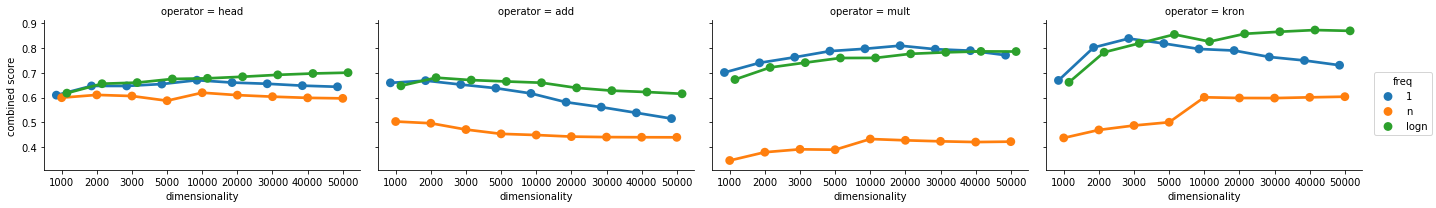

In [206]:
t.plot_interaction(heuristics_selection_collection_compositional[0], feature_ablation_compositional.index[1], 'compositional', ylabels=['combined score'])

In [207]:
assert feature_ablation_compositional.index[1] == 'freq'

r = heuristics_selection_collection_compositional[0]

heuristics_selection_collection_compositional[1] =  r.loc[
    (~((r['operator'] == 'head')) | ((r['freq'] == 'logn'))) &
    (~((r['operator'] == 'add')) | ((r['freq'] == 'logn'))) &
    (~((r['operator'] == 'mult')) | ((r['freq'] == '1'))) &

    (~(((r['operator'] == 'kron') & (r['dimensionality'] < 5000))) | ((r['freq'] == '1'))) &
    (~(((r['operator'] == 'kron') & (r['dimensionality'] >= 5000))) | ((r['freq'] == 'logn'))) &

    True
]

In [208]:
assert feature_ablation_compositional.index[2] == 'operator'

In [209]:
_ = (
    heuristics_selection_collection_compositional[1]
    .set_index(['operator'] + parameters)['compositional']
    .unstack(['cds', 'operator', 'dimensionality'])
)
_
# _.mean(axis=0)#.unstack('neg').max(axis=1)
(
    _.mean(axis=0).unstack('cds').apply(lambda c: _.mean(axis=0).unstack('cds').max(axis=1) - c, axis=0)
) > 0.14

cds                       0.75      1 global
operator dimensionality                     
add      1000            False  False  False
         2000            False  False  False
         3000            False  False  False
         5000            False  False  False
         10000           False  False  False
         20000           False  False  False
         30000           False  False  False
         40000           False  False  False
         50000           False  False  False
head     1000            False  False  False
         2000            False  False  False
         3000            False  False  False
         5000            False  False  False
         10000           False  False  False
         20000           False  False  False
         30000           False  False  False
         40000           False  False  False
         50000           False  False  False
kron     1000             True   True  False
         2000            False  False  False
         3000            False  False  False
         5000            False  False  False
         10000           False  False  False
         20000           False  False  False
         30000           False  False  False
         40000           False  False  False
         50000           False  False  False
mult     1000             True  False  False
         2000            False  False  False
         3000            False  False  False
         5000            False  False  False
         10000            True  False  False
         20000           False  False  False
         30000           False  False  False
         40000           False  False  False
         50000           False  False  False

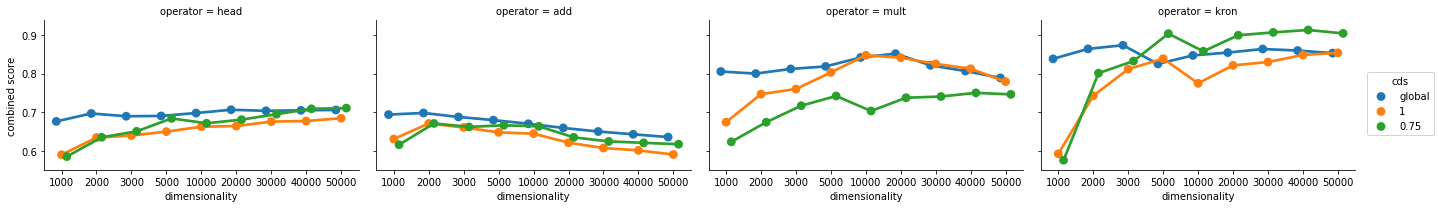

In [210]:
t.plot_interaction(heuristics_selection_collection_compositional[1], feature_ablation_compositional.index[3], 'compositional', ylabels=['combined score'])

In [211]:
assert feature_ablation_compositional.index[3] == 'cds'

r = heuristics_selection_collection_compositional[1]

heuristics_selection_collection_compositional[2] =  r.loc[
    (~((r['operator'] == 'head')) | ((r['cds'] == 'global'))) &
    (~((r['operator'] == 'add')) | ((r['cds'] == 'global'))) &
    (~((r['operator'] == 'mult')) | ((r['cds'] == 'global'))) &

    (~(((r['operator'] == 'kron') & (r['dimensionality'] < 5000))) | ((r['cds'] == 'global'))) &
    (~(((r['operator'] == 'kron') & (r['dimensionality'] >= 5000))) | ((r['cds'] == '0.75'))) &

    True
]

In [212]:
_ = (
    heuristics_selection_collection_compositional[2]
    .set_index(['operator'] + parameters)['compositional']
    .unstack(['similarity', 'operator', 'dimensionality'])
)
_
# _.mean(axis=0)#.unstack('neg').max(axis=1)
(
    _.mean(axis=0).unstack('similarity').apply(lambda c: _.mean(axis=0).unstack('similarity').max(axis=1) - c, axis=0)
) > 0.14

similarity              correlation    cos inner_product
operator dimensionality                                 
add      1000                 False  False         False
         2000                 False  False         False
         3000                 False  False         False
         5000                 False  False         False
         10000                False  False         False
         20000                False  False         False
         30000                False  False         False
         40000                False  False         False
         50000                False  False         False
head     1000                 False  False         False
         2000                 False  False         False
         3000                 False  False         False
         5000                 False  False         False
         10000                False  False         False
         20000                False  False         False
         30000                False  False         False
         40000                False  False         False
         50000                False  False         False
kron     1000                 False  False         False
         2000                 False  False         False
         3000                 False  False         False
         5000                 False  False         False
         10000                False  False         False
         20000                False  False         False
         30000                False  False         False
         40000                False  False         False
         50000                False  False         False
mult     1000                 False  False          True
         2000                 False  False          True
         3000                 False  False          True
         5000                 False  False          True
         10000                False  False          True
         20000                False  False          True
         30000                False  False          True
         40000                False  False          True
         50000                False  False          True

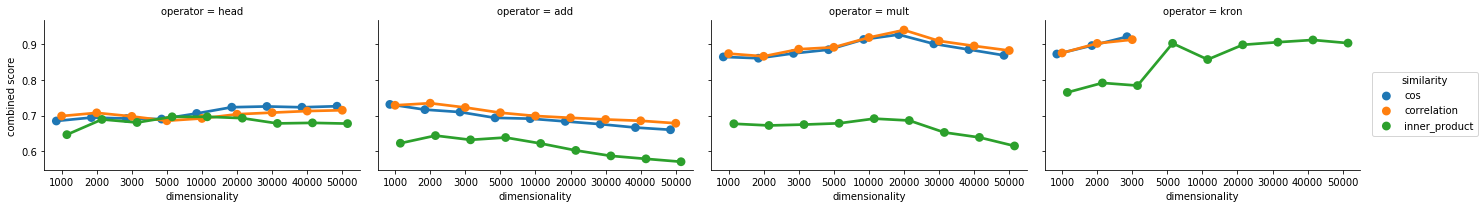

In [213]:
t.plot_interaction(heuristics_selection_collection_compositional[2], feature_ablation_compositional.index[4], 'compositional', ylabels=['combined score'])

In [214]:
assert feature_ablation_compositional.index[4] == 'similarity'

r = heuristics_selection_collection_compositional[2]

heuristics_selection_collection_compositional[3] =  r.loc[
    (~(((r['operator'] == 'head') & (r['dimensionality'] < 5000))) | ((r['similarity'] == 'correlation'))) &
    (~(((r['operator'] == 'head') & (r['dimensionality'] >= 5000))) | ((r['similarity'] == 'cos'))) &

    (~((r['operator'] == 'add')) | ((r['similarity'] == 'correlation'))) &
    (~((r['operator'] == 'mult')) | ((r['similarity'] == 'correlation'))) &

    (~(((r['operator'] == 'kron') & (r['dimensionality'] < 5000))) | ((r['similarity'] == 'correlation'))) &
    (~(((r['operator'] == 'kron') & (r['dimensionality'] >= 5000))) | ((r['similarity'] == 'inner_product'))) &

    True
]

In [215]:
_ = (
    heuristics_selection_collection_compositional[3]
    .set_index(['operator'] + parameters)['compositional']
    .unstack(['discr', 'operator', 'dimensionality'])
)
_
# _.mean(axis=0)#.unstack('neg').max(axis=1)
(
    _.mean(axis=0).unstack('discr').apply(lambda c: _.mean(axis=0).unstack('discr').max(axis=1) - c, axis=0)
) > 0.14

discr                    scpmi   spmi
operator dimensionality              
add      1000            False  False
         2000            False  False
         3000            False  False
         5000            False  False
         10000           False  False
         20000           False  False
         30000           False  False
         40000           False  False
         50000           False  False
head     1000            False  False
         2000            False  False
         3000            False  False
         5000            False  False
         10000           False  False
         20000           False  False
         30000           False  False
         40000           False  False
         50000           False  False
kron     1000            False  False
         2000            False  False
         3000            False  False
         5000            False  False
         10000           False  False
         20000           False  False
         30000           False  False
         40000           False  False
         50000           False  False
mult     1000            False  False
         2000            False  False
         3000            False  False
         5000            False  False
         10000           False  False
         20000           False  False
         30000           False  False
         40000           False  False
         50000           False  False

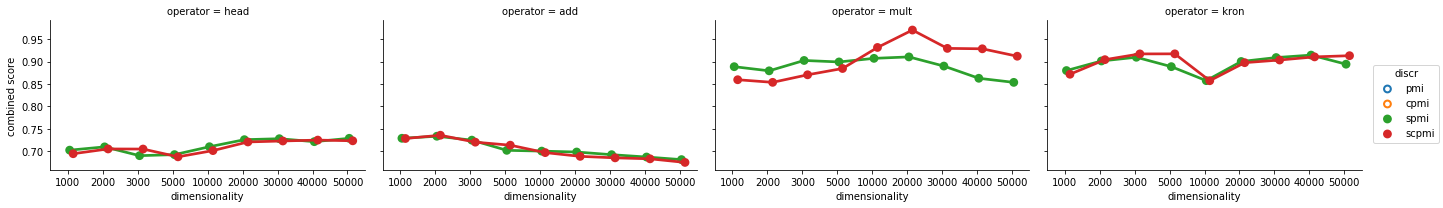

In [216]:
t.plot_interaction(heuristics_selection_collection_compositional[3], feature_ablation_compositional.index[5], 'compositional', ylabels=['combined score'])

In [217]:
assert feature_ablation_compositional.index[5] == 'discr'

r = heuristics_selection_collection_compositional[3]

heuristics_selection_collection_compositional[4] =  r.loc[
    (~((r['operator'] == 'head')) | ((r['discr'] == 'spmi'))) &
    (~((r['operator'] == 'add')) | ((r['discr'] == 'spmi'))) &

    (~(((r['operator'] == 'mult') & (r['dimensionality'] < 10000))) | ((r['discr'] == 'spmi'))) &
    (~(((r['operator'] == 'mult') & (r['dimensionality'] >= 10000))) | ((r['discr'] == 'scpmi'))) &

    (~(((r['operator'] == 'kron') & (r['dimensionality'] < 10000))) | ((r['discr'] == 'scpmi'))) &
    (~(((r['operator'] == 'kron') & (r['dimensionality'] >= 10000))) | ((r['discr'] == 'spmi'))) &

    True
]

In [218]:
assert feature_ablation_compositional.index[6] == 'dimensionality'

In [219]:
assert len(feature_ablation_compositional) == 7

In [220]:
heuristics_selection_compositional = heuristics_selection_collection_compositional[4].set_index(['operator', 'dimensionality'], drop=False)
heuristics_selection_compositional['selection'] = 'heuristics'
heuristics_selection_compositional.sort_index(inplace=True)

In [221]:
dataset_mapping['compositional'] = (
    max_selection_compositional,
    heuristics_selection_compositional,
)

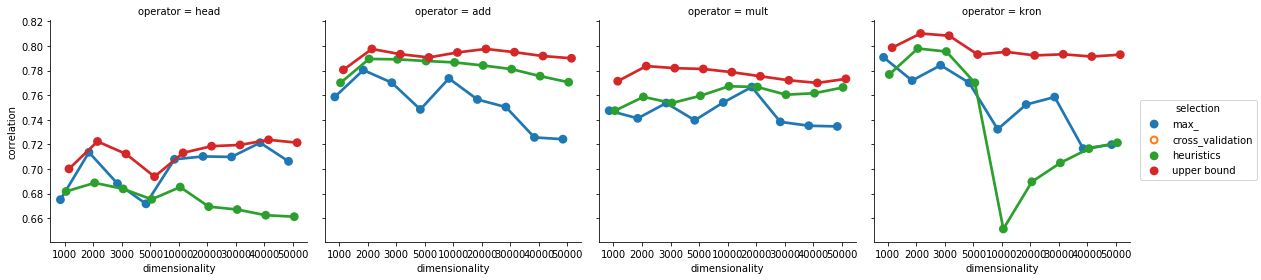

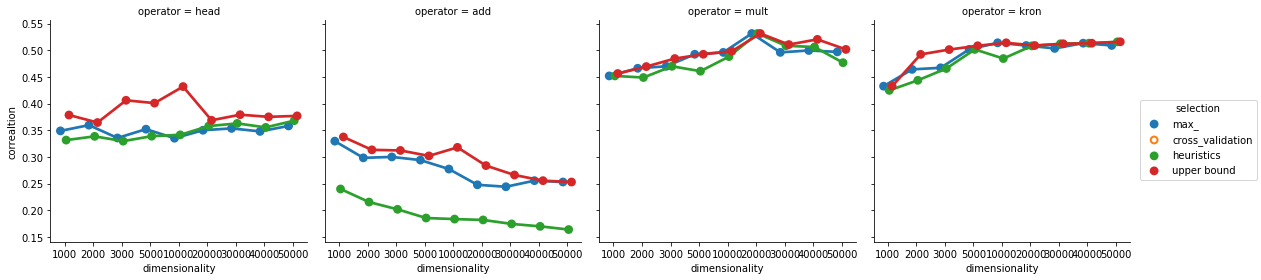

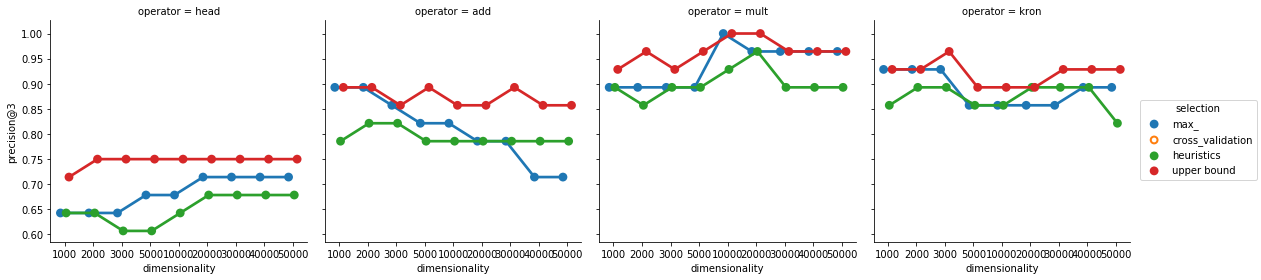

In [222]:
t.plot_parameter_selection_comparison(
    [
        max_selection_compositional,
        heuristics_selection_compositional,
        
        max_selection_ks14.assign(selection='upper bound')
    ],
    'KS14',
    'KS14',
    col='operator',
    ylabel='correlation',

).fig.savefig('figures/compositional-results-ks14.pdf')

t.plot_parameter_selection_comparison(
    [
        max_selection_compositional,
        heuristics_selection_compositional,
        
        max_selection_gs11.assign(selection='upper bound'),
        max_selection_lexical.assign(selection='upper bound1', operator='add')
    ],
    'GS11',
    'GS11',
    col='operator',
    ylabel='correaltion',

).fig.savefig('figures/compositional-results-gs11.pdf')

t.plot_parameter_selection_comparison(
    [
        max_selection_compositional,
        heuristics_selection_compositional,
        
        max_selection_phraserel.assign(selection='upper bound')
    ],
    'PhraseRel',
    'PhraseRel',
    col='operator',
    ylabel='precision@3',

).fig.savefig('figures/compositional-results-phraserel.pdf')

In [223]:
pd.concat(
    [
        heuristics_selection_compositional.loc[
            ['head', '']
        ],        
        heuristics_selection_compositional.loc[
            ['add', 'mult']
        ],
        heuristics_selection_compositional.loc[
            ['kron', '']
        ],        
    ]
).round({'KS14': 2, 'GS11': 2, 'PhraseRel': 2, 'compositional': 2}).reset_index(drop=True).to_latex(
    'figures/compositional-heuristics-selection.tex',
    columns=[
        'operator',
        'dimensionality',
        'KS14',
        'GS11',
        'PhraseRel',
        'compositional',
        'freq',
        'discr',
        'cds',
        'neg',
        'similarity',
    ],
    index=False,
)

In [224]:
for to_i, to_ in enumerate(('KS14', 'GS11', 'PhraseRel')):
    for method_i, method in (0, 'max'), (-1, 'heuristics'):
        print(
            '{from_} -> {to_}, {method}: {:.2f}'.format(
                t.average_error(
                    dataset_mapping[to_][0].loc[['head', 'add', 'mult', 'kron']],
                    dataset_mapping['compositional'][method_i].loc[['head', 'add', 'mult', 'kron']],
                    to_,
                ),
                from_='compositional',
                to_=to_,
                method=method,
            )
        )

compositional -> KS14, max: 0.04
compositional -> KS14, heuristics: 0.04
compositional -> GS11, max: 0.04
compositional -> GS11, heuristics: 0.13
compositional -> PhraseRel, max: 0.06
compositional -> PhraseRel, heuristics: 0.08


In [225]:
for to_i, to_ in enumerate(('KS14', 'GS11', 'PhraseRel')):
    for method_i, method in (0, 'max'), (-1, 'heuristics'):
        for operator in 'head', 'add', 'mult', 'kron':
            print(
                '{from_} -> {to_}, {method}, {operator}: {:.2f}'.format(
                    t.average_error(
                        dataset_mapping[to_][0].loc[operator],
                        dataset_mapping['compositional'][method_i].loc[operator],
                        to_,
                    ),
                    from_='compositional',
                    to_=to_,
                    method=method,
                    operator=operator,
                )
            )

compositional -> KS14, max, head: 0.02
compositional -> KS14, max, add: 0.05
compositional -> KS14, max, mult: 0.04
compositional -> KS14, max, kron: 0.05
compositional -> KS14, heuristics, head: 0.05
compositional -> KS14, heuristics, add: 0.01
compositional -> KS14, heuristics, mult: 0.02
compositional -> KS14, heuristics, kron: 0.08
compositional -> GS11, max, head: 0.10
compositional -> GS11, max, add: 0.05
compositional -> GS11, max, mult: 0.01
compositional -> GS11, max, kron: 0.02
compositional -> GS11, heuristics, head: 0.10
compositional -> GS11, heuristics, add: 0.35
compositional -> GS11, heuristics, mult: 0.03
compositional -> GS11, heuristics, kron: 0.03
compositional -> PhraseRel, max, head: 0.09
compositional -> PhraseRel, max, add: 0.07
compositional -> PhraseRel, max, mult: 0.03
compositional -> PhraseRel, max, kron: 0.04
compositional -> PhraseRel, heuristics, head: 0.13
compositional -> PhraseRel, heuristics, add: 0.09
compositional -> PhraseRel, heuristics, mult: 0.

# Uniersal

In [226]:
_results = results.unstack('operator')

for operator in (
    'add',
    'mult',
    'kron',
    'relational',
    'copy-object',
    'copy-subject',
    'frobenius-add',
    'frobenius-mult',
    'frobenius-outer',
):
    _results['max', 'SimLex999', operator] = _results['max', 'SimLex999', 'head']

    _results['max', 'men', operator] = _results['max', 'men', 'head']

_results = _results.stack('operator')
_results = _results.swaplevel('operator', 0).sort_index()

In [227]:
_results['max', 'universal'] = (
    _results['max', 'SimLex999'] / results['max', 'SimLex999'].max() / 4 +
    _results['max', 'men'] / results['max', 'men'].max() / 4 +

    _results['max', 'KS14'] / results['max', 'KS14'].max() / 6 +
    _results['max', 'GS11'] / results['max', 'GS11'].max() / 6 +
    _results['max', 'PhraseRel'] / results['max', 'PhraseRel'].max() / 6
)

In [228]:
max_selection_universal = t.plot_selection(
    _results.loc[['add', 'head', 'mult', 'kron']],
    dataset='universal',
    selector_function=t.max_('SimLex999', 'men', 'KS14', 'GS11', 'PhraseRel'),
    plot=False,
)

In [229]:
pd.concat(
    [
            max_selection_universal.loc[
                ['head', '']
            ],        
            max_selection_universal.loc[
                ['add', 'mult']
            ],
            max_selection_universal.loc[
                ['kron', '']
            ],        
        ]
).round(
    {
        'SimLex999': 2, 'men': 2,
        'KS14': 2, 'GS11': 2, 'PhraseRel': 2,
        'universal': 2,
    }
).reset_index(drop=True).to_latex(
    'figures/universal-max_-selection.tex',
    columns=[
        'operator',
        'dimensionality',
        'SimLex999',
        'men',
        'KS14',
        'GS11',
        'PhraseRel',
        'universal',
        'freq',
        'discr',
        'cds',
        'neg',
        'similarity',
    ],
    index=False,
)

In [230]:
'{:.2f}'.format(
    t.anova(
        response='universal',
        predictors=compositional_parameters,
        data=_results.loc[['add', 'head', 'mult', 'kron']],
    ).rsquared_adj
)

'0.83'

In [231]:
feature_ablation_universal = t.calculate_feature_ablation(
    responses=(
        'universal',
    ),
    predictors=compositional_parameters,
    data=_results.loc[['add', 'head', 'mult', 'kron']],
)

feature_ablation_universal.sort_values(('partial R2', 'universal'), ascending=False, inplace=True)

feature_ablation_universal.round(2)

partial R2
response        universal
predictor                
freq                 0.32
neg                  0.29
similarity           0.22
cds                  0.10
discr                0.09
dimensionality       0.07
operator             0.05

In [232]:
(
    feature_ablation_universal['partial R2']
    .reset_index()
    .round({'universal': 2})
    .to_latex('figures/universal-ablation.tex', index=False)
)

In [233]:
heuristics_selection_collection_universal = {}

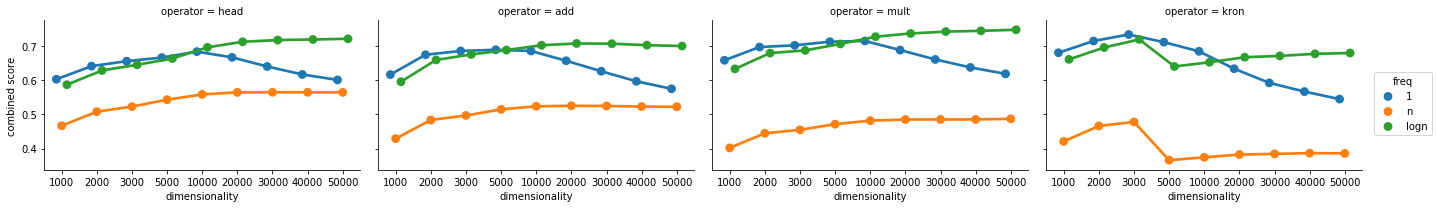

In [234]:
t.plot_interaction(_results.loc[['add', 'head', 'mult', 'kron'], 'max'], feature_ablation_universal.index[0], 'universal' , ylabels=['combined score'])

In [235]:
assert feature_ablation_universal.index[0] == 'freq'

r = _results.loc[['add', 'head', 'mult', 'kron'], 'max'].reset_index()

heuristics_selection_collection_universal[0] =  r.loc[
    (~(((r['operator'] == 'head') & (r['dimensionality'] < 10000))) | ((r['freq'] == '1'))) &
    (~(((r['operator'] == 'head') & (r['dimensionality'] >= 10000))) | ((r['freq'] == 'logn'))) &

    (~(((r['operator'] == 'add') & (r['dimensionality'] < 10000))) | ((r['freq'] == '1'))) &
    (~(((r['operator'] == 'add') & (r['dimensionality'] >= 10000))) | ((r['freq'] == 'logn'))) &

    (~(((r['operator'] == 'mult') & (r['dimensionality'] < 10000))) | ((r['freq'] == '1'))) &
    (~(((r['operator'] == 'mult') & (r['dimensionality'] >= 10000))) | ((r['freq'] == 'logn'))) &

    (~(((r['operator'] == 'kron') & (r['dimensionality'] < 20000))) | ((r['freq'] == '1'))) &
    (~(((r['operator'] == 'kron') & (r['dimensionality'] >= 20000))) | ((r['freq'] == 'logn'))) &

    True
]

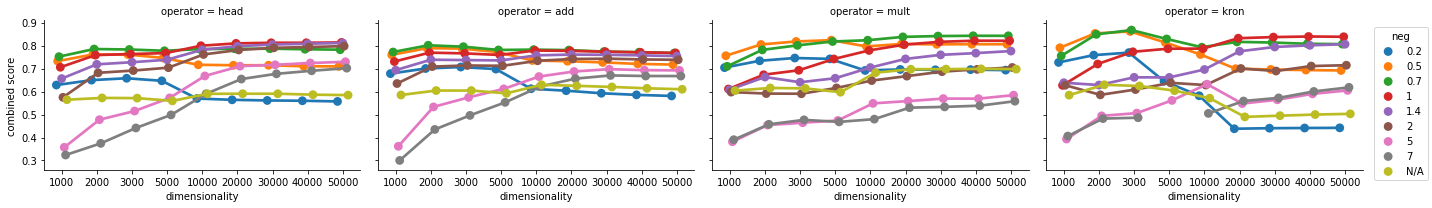

In [236]:
t.plot_interaction(heuristics_selection_collection_universal[0], feature_ablation_universal.index[1], 'universal', ylabels=['combined score'])

In [237]:
assert feature_ablation_universal.index[1] == 'neg'

r = heuristics_selection_collection_universal[0]

heuristics_selection_collection_universal[1] =  r.loc[
    (~(((r['operator'] == 'head') & (r['dimensionality'] < 10000))) | ((r['neg'] == 0.7))) &
    (~(((r['operator'] == 'head') & (r['dimensionality'] >= 10000))) | ((r['neg'] == 1))) &

    (~(((r['operator'] == 'add'))) | ((r['neg'] == 0.7))) &

    (~(((r['operator'] == 'mult') & (r['dimensionality'] < 10000))) | ((r['neg'] == 0.5))) &
    (~(((r['operator'] == 'mult') & (r['dimensionality'] >= 10000))) | ((r['neg'] == 0.7))) &

    (~(((r['operator'] == 'kron') & (r['dimensionality'] < 20000))) | ((r['neg'] == 0.7))) &
    (~(((r['operator'] == 'kron') & (r['dimensionality'] >= 20000))) | ((r['neg'] == 1))) &

    True
]

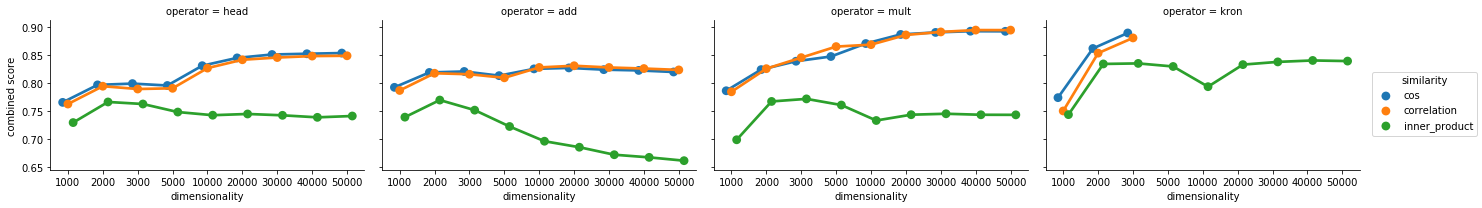

In [238]:
t.plot_interaction(heuristics_selection_collection_universal[1], feature_ablation_universal.index[2], 'universal', ylabels=['combined score'])

In [239]:
assert feature_ablation_universal.index[2] == 'similarity'

r = heuristics_selection_collection_universal[1]

heuristics_selection_collection_universal[2] =  r.loc[
    (~((r['operator'] == 'head')) | ((r['similarity'] == 'cos'))) &
    (~((r['operator'] == 'add')) | ((r['similarity'] == 'correlation'))) &
    (~((r['operator'] == 'mult')) | ((r['similarity'] == 'correlation'))) &

    (~(((r['operator'] == 'kron') & (r['dimensionality'] < 5000))) | ((r['similarity'] == 'cos'))) &
    (~(((r['operator'] == 'kron') & (r['dimensionality'] >= 5000))) | ((r['similarity'] == 'inner_product'))) &

    True
]

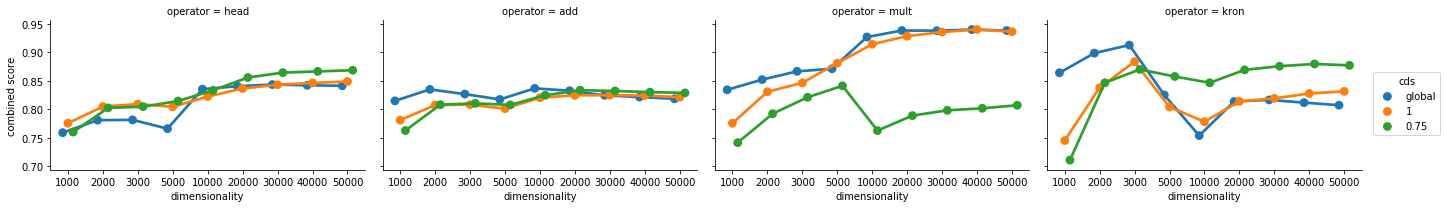

In [240]:
t.plot_interaction(heuristics_selection_collection_universal[2], feature_ablation_universal.index[3], 'universal', ylabels=['combined score'])

In [241]:
assert feature_ablation_universal.index[3] == 'cds'

r = heuristics_selection_collection_universal[2]

heuristics_selection_collection_universal[3] =  r.loc[
    (~((r['operator'] == 'head')) | ((r['cds'] == '0.75'))) &

    (~(((r['operator'] == 'add') & (r['dimensionality'] < 20000))) | ((r['cds'] == 'global'))) &
    (~(((r['operator'] == 'add') & (r['dimensionality'] >= 20000))) | ((r['cds'] == '0.75'))) &
    
    (~((r['operator'] == 'mult')) | ((r['cds'] == 'global'))) &

    (~(((r['operator'] == 'kron') & (r['dimensionality'] < 5000))) | ((r['cds'] == 'global'))) &
    (~(((r['operator'] == 'kron') & (r['dimensionality'] >= 5000))) | ((r['cds'] == '0.75'))) &

    True
]

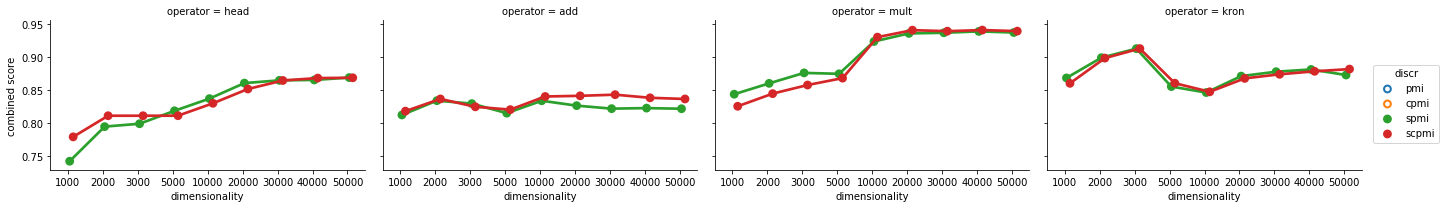

In [242]:
t.plot_interaction(heuristics_selection_collection_universal[3], feature_ablation_universal.index[4], 'universal', ylabels=['combined score'])

In [243]:
assert feature_ablation_universal.index[4] == 'discr'

r = heuristics_selection_collection_universal[3]

heuristics_selection_collection_universal[4] =  r.loc[
    (~((r['operator'] == 'head') & (r['dimensionality'] < 5000)) | ((r['discr'] == 'scpmi'))) &
    (~((r['operator'] == 'head') & (r['dimensionality'] >= 5000)) | ((r['discr'] == 'spmi'))) &

    (~((r['operator'] == 'add')) | ((r['discr'] == 'scpmi'))) &

    (~((r['operator'] == 'mult') & (r['dimensionality'] < 10000)) | ((r['discr'] == 'spmi'))) &
    (~((r['operator'] == 'mult') & (r['dimensionality'] >= 10000)) | ((r['discr'] == 'scpmi'))) &

    (~((r['operator'] == 'kron')) | ((r['discr'] == 'spmi'))) &

    True
]

In [244]:
assert feature_ablation_universal.index[5] == 'dimensionality'

In [245]:
assert feature_ablation_universal.index[6] == 'operator'

In [246]:
assert len(feature_ablation_universal) == 7

In [247]:
heuristics_selection_universal = heuristics_selection_collection_universal[4].set_index(['operator', 'dimensionality'], drop=False)
heuristics_selection_universal['selection'] = 'heuristics'
heuristics_selection_universal.sort_index(inplace=True)

In [248]:
pd.concat(
    [
            heuristics_selection_universal.loc[
                ['head', '']
            ],        
            heuristics_selection_universal.loc[
                ['add', 'mult']
            ],
            heuristics_selection_universal.loc[
                ['kron', '']
            ],        
        ]
).round(
    {
        'SimLex999': 2, 'men': 2,
        'KS14': 2, 'GS11': 2, 'PhraseRel': 2,
        'universal': 2,
    }
).reset_index(drop=True).to_latex(
    'figures/universal-heuristics-selection.tex',
    columns=[
        'operator',
        'dimensionality',
        'SimLex999',
        'men',
        'KS14',
        'GS11',
        'PhraseRel',
        'universal',
        'freq',
        'discr',
        'cds',
        'neg',
        'similarity',
    ],
    index=False,
)

In [249]:
_lexical_selections = pd.concat(
    [
        pd.concat(
            [
                _results.loc[operator].loc[max_selection_lexical.set_index([n for n in _results.index.names if n != 'operator']).index]
                ['max'].assign(operator=operator).reset_index().set_index(['operator', 'dimensionality'], drop=False)
                for operator in ('head', 'add', 'mult', 'kron')
            ]
        ).assign(selection='lexical, max_'),

        pd.concat(
            [
                _results.loc[operator].loc[heuristics_selection_lexical.set_index([n for n in _results.index.names if n != 'operator']).index]
                ['max'].assign(operator=operator).reset_index().set_index(['operator', 'dimensionality'], drop=False)
                for operator in ('head', 'add', 'mult', 'kron')
            ]
        ).assign(selection='lexical, heuristics'),

    ]
)

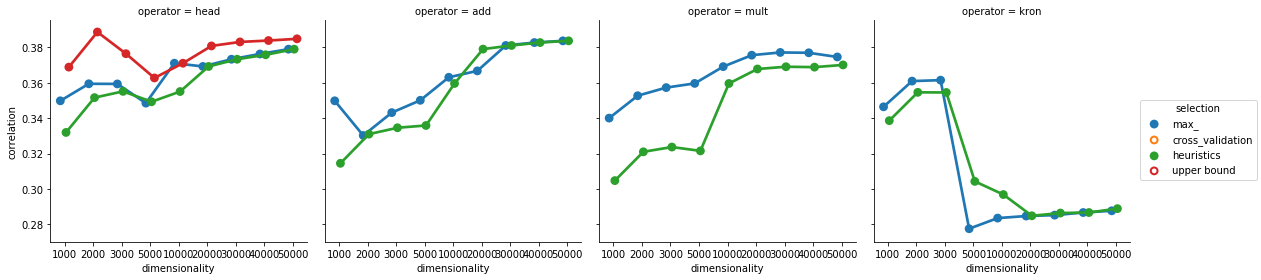

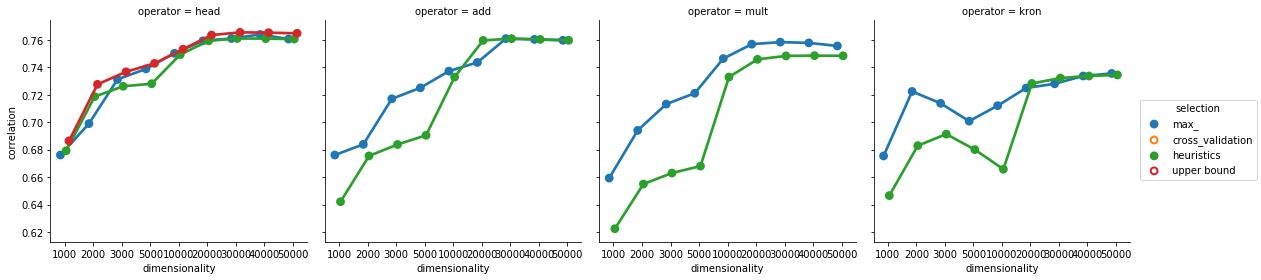

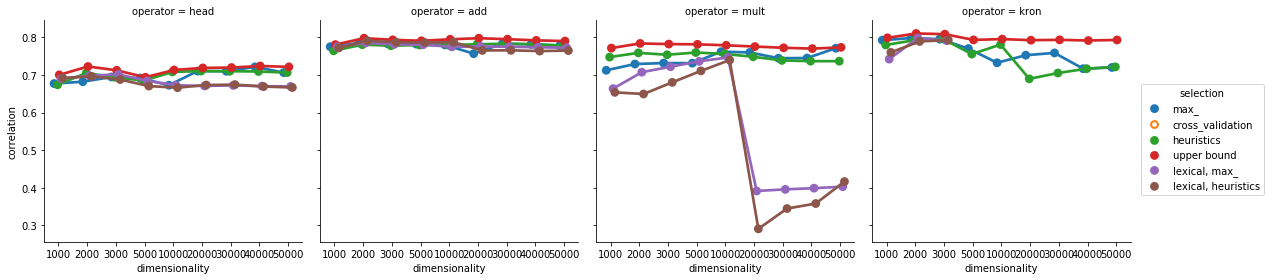

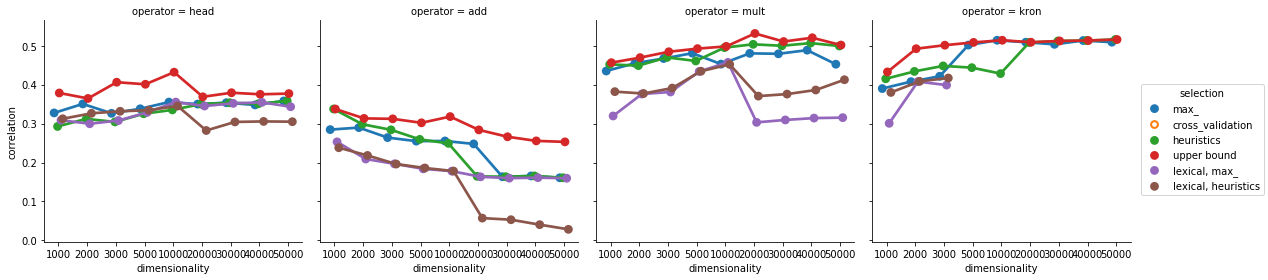

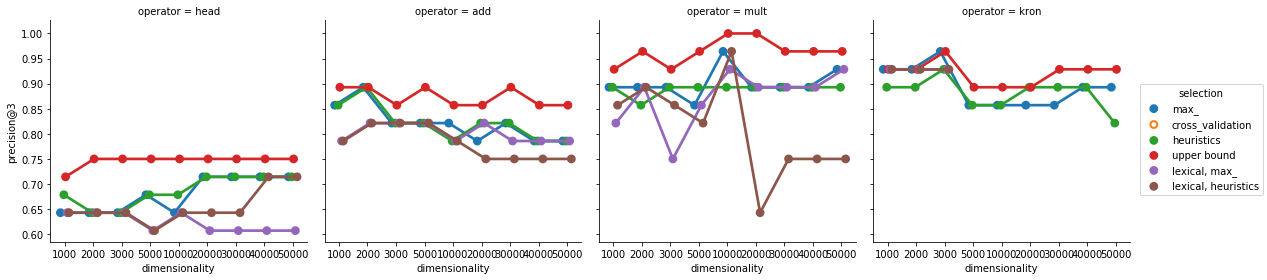

In [250]:
t.plot_parameter_selection_comparison(
    [
        max_selection_universal,
        heuristics_selection_universal,

        max_selection_simlex.assign(selection='upper bound'),
    ],
    'SimLex999',
    'SimLex999',
    col='operator',
    ylabel='correlation',

).fig.savefig('figures/universal-results-simlex999.pdf')

t.plot_parameter_selection_comparison(
    [
        max_selection_universal,
        heuristics_selection_universal,
        
        max_selection_men.assign(selection='upper bound'),
],
    'men',
    'men',
    col='operator',
    ylabel='correlation',

).fig.savefig('figures/universal-results-men.pdf')

t.plot_parameter_selection_comparison(
    [
        max_selection_universal,
        heuristics_selection_universal,
        
        max_selection_ks14.assign(selection='upper bound'),
        
        _lexical_selections,
    ],
    'KS14',
    'KS14',
    col='operator',
    extra_hue=('lexical, max_', 'lexical, heuristics'),
    ylabel='correlation',
).fig.savefig('figures/universal-results-ks14.pdf')

t.plot_parameter_selection_comparison(
    [
        max_selection_universal,
        heuristics_selection_universal,
        
        max_selection_gs11.assign(selection='upper bound'),

        _lexical_selections,
    ],
    'GS11',
    'GS11',
    col='operator',
    extra_hue=('lexical, max_', 'lexical, heuristics'),
    ylabel='correlation',
).fig.savefig('figures/universal-results-gs11.pdf')

t.plot_parameter_selection_comparison(
    [
        max_selection_universal,
        heuristics_selection_universal,
        
        max_selection_phraserel.assign(selection='upper bound'),

        _lexical_selections,
    ],
    'PhraseRel',
    'PhraseRel',
    col='operator',
    extra_hue=('lexical, max_', 'lexical, heuristics'),
    ylabel='precision@3',
).fig.savefig('figures/universal-results-PhraseRel.pdf')

In [251]:
dataset_mapping['universal'] = max_selection_universal, heuristics_selection_universal

In [252]:
dataset_mapping['men'] = max_selection_men, heuristics_selection_men
dataset_mapping['SimLex999'] = max_selection_simlex, heuristics_selection_simlex

In [253]:
for to_i, to_ in enumerate(('SimLex999', 'men', 'KS14', 'GS11', 'PhraseRel')):
    for method_i, method in (0, 'max'), (-1, 'heuristics'):
        print(
            '{from_} -> {to_}, {method}: {:.2f}'.format(
                t.average_error(
                    dataset_mapping[to_][0].loc[['head', 'add', 'mult', 'kron']],
                    dataset_mapping['universal'][method_i].loc[['head', 'add', 'mult', 'kron']],
                    to_,
                ),
                from_='universal',
                to_=to_,
                method=method,
            )
        )

universal -> SimLex999, max: 0.03
universal -> SimLex999, heuristics: 0.05
universal -> men, max: 0.01
universal -> men, heuristics: 0.01
universal -> KS14, max: 0.03
universal -> KS14, heuristics: 0.03
universal -> GS11, max: 0.11
universal -> GS11, heuristics: 0.11
universal -> PhraseRel, max: 0.06
universal -> PhraseRel, heuristics: 0.07


In [254]:
for to_i, to_ in enumerate(('SimLex999', 'men', 'KS14', 'GS11', 'PhraseRel')):
    for method_i, method in (0, 'max'), (-1, 'heuristics'):
        for operator in 'head', 'add', 'mult', 'kron':
            operator_from = operator
            if to_ in ('SimLex999', 'men'):
                operator_from = 'head'

            print(
                '{from_} -> {to_}, {method}, {operator}: {:.2f}'.format(
                    t.average_error(
                        dataset_mapping[to_][0].loc[operator_from],
                        dataset_mapping['universal'][method_i].loc[operator],
                        to_,
                    ),
                    from_='universal',
                    to_=to_,
                    method=method,
                    operator=operator,
                )
            )

universal -> SimLex999, max, head: 0.03
universal -> SimLex999, max, add: 0.04
universal -> SimLex999, max, mult: 0.03
universal -> SimLex999, max, kron: 0.18
universal -> SimLex999, heuristics, head: 0.05
universal -> SimLex999, heuristics, add: 0.06
universal -> SimLex999, heuristics, mult: 0.09
universal -> SimLex999, heuristics, kron: 0.18
universal -> men, max, head: 0.01
universal -> men, max, add: 0.02
universal -> men, max, mult: 0.02
universal -> men, max, kron: 0.04
universal -> men, heuristics, head: 0.01
universal -> men, heuristics, add: 0.04
universal -> men, heuristics, mult: 0.06
universal -> men, heuristics, kron: 0.06
universal -> KS14, max, head: 0.03
universal -> KS14, max, add: 0.02
universal -> KS14, max, mult: 0.04
universal -> KS14, max, kron: 0.05
universal -> KS14, heuristics, head: 0.02
universal -> KS14, heuristics, add: 0.02
universal -> KS14, heuristics, mult: 0.04
universal -> KS14, heuristics, kron: 0.06
universal -> GS11, max, head: 0.10
universal -> GS

## One for all space

In [255]:
_ = _results.loc[['head', 'add', 'mult', 'kron']].unstack('operator')['max'][['SimLex999', 'men', 'GS11', 'KS14', 'PhraseRel']]

_single_score = pd.DataFrame(
    {
        'single': (
            _['SimLex999', 'head'] / _['SimLex999', 'head'].max()  / 4 +
            _['men', 'head'] / _['men', 'head'].max() / 4 +

            _['GS11', 'add'] / _['GS11', 'add'].max() / 12 +
            _['GS11', 'mult'] / _['GS11', 'mult'].max() / 12 +
#             _['GS11', 'kron'] / _['GS11', 'kron'].max() / 18 +

            _['KS14', 'add'] / _['KS14', 'add'].max() / 12 +
            _['KS14', 'mult'] / _['KS14', 'mult'].max() / 12 +
#             _['KS14', 'kron'] / _['KS14', 'kron'].max() / 18 +

            _['PhraseRel', 'add'] / _['PhraseRel', 'add'].max() / 12 +
            _['PhraseRel', 'mult'] / _['PhraseRel', 'mult'].max() / 12 +
#             _['PhraseRel', 'kron'] / _['PhraseRel', 'kron'].max() / 18 +
            0
        ),
    }
)

_results['max', 'single'] = pd.concat(
    [
        _single_score.assign(operator='head'),
        _single_score.assign(operator='add'),
        _single_score.assign(operator='mult'),
        _single_score.assign(operator='kron'),
    ]
).reset_index().set_index(_results.index.names)['single']


In [256]:
max_selection_single = t.plot_selection(
    _results.loc[['add', 'head', 'mult', 'kron']],
    dataset='single',
    selector_function=t.max_('SimLex999', 'men', 'KS14', 'GS11', 'PhraseRel', 'universal'),
    plot=False,
)

In [257]:
_ = pd.concat(
    [
            max_selection_single.loc[
                ['head', '']
            ],        
            max_selection_single.loc[
                ['add', 'mult']
            ],
            max_selection_single.loc[
                ['kron', '']
            ],        
        ]
).round(
    {
        'SimLex999': 2, 'men': 2,
        'KS14': 2, 'GS11': 2, 'PhraseRel': 2,
        'universal': 2,
    }
)

_ = _.set_index(compositional_parameters + ['reduction', 'base', 'context_type', 'corpus'])
_ = _.unstack('operator').swaplevel(0, 1, axis='columns')[
    [
        ('head', 'SimLex999'),
        ('head', 'men'),
        #('head', 'universal'),
        #('head', 'single'),

        #('head', 'KS14'),
        #('head', 'GS11'),
        #('head', 'PhraseRel'),

        ('add', 'KS14'),
        ('add', 'GS11'),
        ('add', 'PhraseRel'),
        #('add', 'universal'),

        ('mult', 'KS14'),
        ('mult', 'GS11'),
        ('mult', 'PhraseRel'),

        ('kron', 'KS14'),
        ('kron', 'GS11'),
        ('kron', 'PhraseRel'),
    ]
].reset_index(['reduction', 'base', 'context_type', 'corpus'], drop=True)

_.to_latex(
    'figures/single-max_-selection.tex',
)

_

operator                                              head         add        \
                                                 SimLex999   men  KS14  GS11   
dimensionality discr cds    freq neg similarity                                
1000           scpmi global 1    0.7 cos              0.33  0.65  0.74  0.32   
2000           scpmi global 1    0.7 cos              0.35  0.68  0.75  0.29   
3000           scpmi global 1    0.7 cos              0.35  0.69  0.76  0.29   
5000           cpmi  1      logn N/A correlation      0.35  0.73  0.78  0.25   
10000          scpmi global logn 0.7 correlation      0.36  0.73  0.78  0.25   
20000          cpmi  1      logn N/A correlation      0.37  0.75  0.78  0.24   
30000          scpmi 1      logn 0.7 correlation      0.37  0.76  0.78  0.17   
40000          scpmi 1      logn 0.7 correlation      0.37  0.76  0.78  0.17   
50000          scpmi global logn 0.7 correlation      0.37  0.75  0.76  0.20   

operator                                                    mult        \
                                                 PhraseRel  KS14  GS11   
dimensionality discr cds    freq neg similarity                          
1000           scpmi global 1    0.7 cos              0.86  0.73  0.44   
2000           scpmi global 1    0.7 cos              0.79  0.74  0.45   
3000           scpmi global 1    0.7 cos              0.82  0.74  0.48   
5000           cpmi  1      logn N/A correlation      0.82  0.75  0.43   
10000          scpmi global logn 0.7 correlation      0.79  0.76  0.50   
20000          cpmi  1      logn N/A correlation      0.71  0.74  0.44   
30000          scpmi 1      logn 0.7 correlation      0.79  0.75  0.48   
40000          scpmi 1      logn 0.7 correlation      0.79  0.75  0.49   
50000          scpmi global logn 0.7 correlation      0.71  0.74  0.50   

operator                                                    kron        \
                                                 PhraseRel  KS14  GS11   
dimensionality discr cds    freq neg similarity                          
1000           scpmi global 1    0.7 cos              0.89  0.76  0.43   
2000           scpmi global 1    0.7 cos              0.82  0.78  0.44   
3000           scpmi global 1    0.7 cos              0.86  0.78  0.47   
5000           cpmi  1      logn N/A correlation      0.89   NaN   NaN   
10000          scpmi global logn 0.7 correlation      0.89   NaN   NaN   
20000          cpmi  1      logn N/A correlation      1.00   NaN   NaN   
30000          scpmi 1      logn 0.7 correlation      0.89   NaN   NaN   
40000          scpmi 1      logn 0.7 correlation      0.89   NaN   NaN   
50000          scpmi global logn 0.7 correlation      0.89   NaN   NaN   

operator                                                    
                                                 PhraseRel  
dimensionality discr cds    freq neg similarity             
1000           scpmi global 1    0.7 cos              0.86  
2000           scpmi global 1    0.7 cos              0.89  
3000           scpmi global 1    0.7 cos              0.93  
5000           cpmi  1      logn N/A correlation       NaN  
10000          scpmi global logn 0.7 correlation       NaN  
20000          cpmi  1      logn N/A correlation       NaN  
30000          scpmi 1      logn 0.7 correlation       NaN  
40000          scpmi 1      logn 0.7 correlation       NaN  
50000          scpmi global logn 0.7 correlation       NaN

In [258]:
'{:.2f}'.format(
    t.anova(
        response='single',
        predictors=parameters,
        data=_results.loc[['add', 'head', 'mult']],
    ).rsquared_adj
)

'0.90'

In [259]:
feature_ablation_single = t.calculate_feature_ablation(
    responses=(
        'single',
    ),
    predictors=parameters,
    data=_results.loc[['head', 'add', 'mult']],
)

feature_ablation_single.sort_values(('partial R2', 'single'), ascending=False, inplace=True)

feature_ablation_single.round(2)

partial R2
response           single
predictor                
freq                 0.43
similarity           0.27
neg                  0.20
discr                0.09
cds                  0.09
dimensionality       0.03

In [260]:
(
    feature_ablation_single['partial R2']
    .reset_index()
    .round({'single': 2})
    .to_latex('figures/single-ablation.tex', index=False)
)

In [261]:
heuristics_selection_collection_single = {}

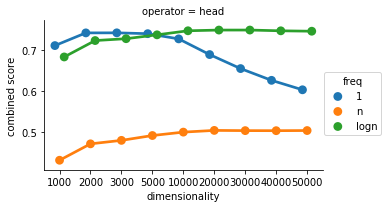

In [262]:
t.plot_interaction(_results.loc[['add', 'head', 'mult'], 'max'], feature_ablation_single.index[0], 'single', ylabels=['combined score'])

In [263]:
assert feature_ablation_single.index[0] == 'freq'

r = _results.loc[['add', 'head', 'mult', 'kron'], 'max'].reset_index()

heuristics_selection_collection_single[0] =  r.loc[
    (~(((r['dimensionality'] < 20000))) | ((r['freq'] == '1'))) &
    (~(((r['dimensionality'] >= 20000))) | ((r['freq'] == 'logn'))) &

    True
]

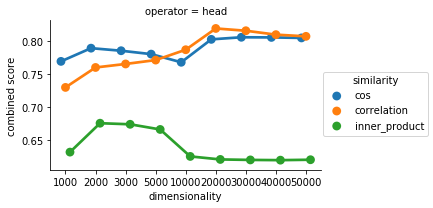

In [264]:
t.plot_interaction(heuristics_selection_collection_single[0], feature_ablation_single.index[1], 'single', ylabels=['combined score'])

In [265]:
assert feature_ablation_single.index[1] == 'similarity'

r = heuristics_selection_collection_single[0]

heuristics_selection_collection_single[1] =  r.loc[
    (~(((r['dimensionality'] < 20000))) | ((r['similarity'] == 'cos'))) &
    (~(((r['dimensionality'] >= 20000))) | ((r['similarity'] == 'correlation'))) &

    True
]

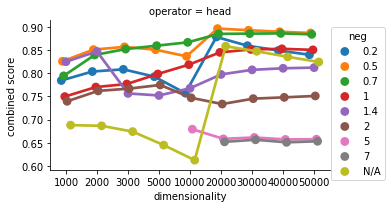

In [266]:
t.plot_interaction(heuristics_selection_collection_single[1], feature_ablation_single.index[2], 'single', ylabels=['combined score'])

In [267]:
assert feature_ablation_single.index[2] == 'neg'

r = heuristics_selection_collection_single[1]

heuristics_selection_collection_single[2] =  r.loc[
    (r['neg'] == 0.7)
]

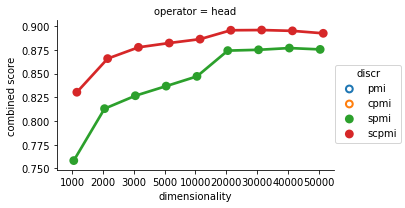

In [268]:
t.plot_interaction(heuristics_selection_collection_single[2], feature_ablation_single.index[3], 'single', ylabels=['combined score'])

In [269]:
assert feature_ablation_single.index[3] == 'discr'

r = heuristics_selection_collection_single[2]

heuristics_selection_collection_single[3] =  r.loc[
    (r['discr'] == 'scpmi')
]

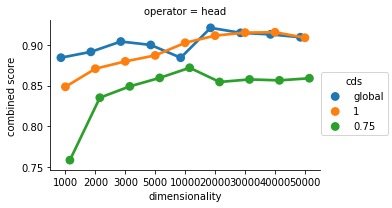

In [270]:
t.plot_interaction(heuristics_selection_collection_single[3], feature_ablation_single.index[4], 'single', ylabels=['combined score'])

In [271]:
assert feature_ablation_single.index[4] == 'cds'

r = heuristics_selection_collection_single[3]

heuristics_selection_collection_single[4] =  r.loc[
    (r['cds'] == 'global')
]

In [272]:
assert feature_ablation_single.index[5] == 'dimensionality'

In [273]:
assert len(feature_ablation_single.index) == 6

In [274]:
heuristics_selection_single = heuristics_selection_collection_single[4].set_index(['operator', 'dimensionality'], drop=False)
heuristics_selection_single['selection'] = 'heuristics'
heuristics_selection_single.sort_index(inplace=True)

In [275]:
_ = pd.concat(
    [
            heuristics_selection_single.loc[
                ['head', '']
            ],        
            heuristics_selection_single.loc[
                ['add', 'mult']
            ],
            heuristics_selection_single.loc[
                ['kron', '']
            ],        
        ]
).round(
    {
        'SimLex999': 2, 'men': 2,
        'KS14': 2, 'GS11': 2, 'PhraseRel': 2,
        'universal': 2, 'single': 2,
    }
)

_ = _.set_index(compositional_parameters + ['reduction', 'base', 'context_type', 'corpus'])
_ = _.unstack('operator').swaplevel(0, 1, axis='columns')[
    [
        ('head', 'SimLex999'),
        ('head', 'men'),
        #('head', 'universal'),
        #('head', 'single'),

        #('head', 'KS14'),
        #('head', 'GS11'),
        #('head', 'PhraseRel'),

        ('add', 'KS14'),
        ('add', 'GS11'),
        ('add', 'PhraseRel'),
        #('add', 'universal'),

        ('mult', 'KS14'),
        ('mult', 'GS11'),
        ('mult', 'PhraseRel'),

        ('kron', 'KS14'),
        ('kron', 'GS11'),
        ('kron', 'PhraseRel'),
    ]
].reset_index(['reduction', 'base', 'context_type', 'corpus'], drop=True)

_.to_latex(
    'figures/single-heuristics-selection.tex',
)

_

operator                                              head         add        \
                                                 SimLex999   men  KS14  GS11   
dimensionality discr cds    freq neg similarity                                
1000           scpmi global 1    0.7 cos              0.33  0.65  0.74  0.32   
2000           scpmi global 1    0.7 cos              0.35  0.68  0.75  0.29   
3000           scpmi global 1    0.7 cos              0.35  0.69  0.76  0.29   
5000           scpmi global 1    0.7 cos              0.34  0.70  0.75  0.27   
10000          scpmi global 1    0.7 cos              0.33  0.70  0.74  0.24   
20000          scpmi global logn 0.7 correlation      0.37  0.75  0.77  0.23   
30000          scpmi global logn 0.7 correlation      0.37  0.75  0.77  0.22   
40000          scpmi global logn 0.7 correlation      0.37  0.75  0.77  0.21   
50000          scpmi global logn 0.7 correlation      0.37  0.75  0.76  0.20   

operator                                                    mult        \
                                                 PhraseRel  KS14  GS11   
dimensionality discr cds    freq neg similarity                          
1000           scpmi global 1    0.7 cos              0.86  0.73  0.44   
2000           scpmi global 1    0.7 cos              0.79  0.74  0.45   
3000           scpmi global 1    0.7 cos              0.82  0.74  0.48   
5000           scpmi global 1    0.7 cos              0.82  0.74  0.49   
10000          scpmi global 1    0.7 cos              0.75  0.75  0.49   
20000          scpmi global logn 0.7 correlation      0.75  0.75  0.50   
30000          scpmi global logn 0.7 correlation      0.71  0.74  0.50   
40000          scpmi global logn 0.7 correlation      0.71  0.74  0.51   
50000          scpmi global logn 0.7 correlation      0.71  0.74  0.50   

operator                                                    kron        \
                                                 PhraseRel  KS14  GS11   
dimensionality discr cds    freq neg similarity                          
1000           scpmi global 1    0.7 cos              0.89  0.76  0.43   
2000           scpmi global 1    0.7 cos              0.82  0.78  0.44   
3000           scpmi global 1    0.7 cos              0.86  0.78  0.47   
5000           scpmi global 1    0.7 cos              0.89   NaN   NaN   
10000          scpmi global 1    0.7 cos              0.93   NaN   NaN   
20000          scpmi global logn 0.7 correlation      0.89   NaN   NaN   
30000          scpmi global logn 0.7 correlation      0.89   NaN   NaN   
40000          scpmi global logn 0.7 correlation      0.89   NaN   NaN   
50000          scpmi global logn 0.7 correlation      0.89   NaN   NaN   

operator                                                    
                                                 PhraseRel  
dimensionality discr cds    freq neg similarity             
1000           scpmi global 1    0.7 cos              0.86  
2000           scpmi global 1    0.7 cos              0.89  
3000           scpmi global 1    0.7 cos              0.93  
5000           scpmi global 1    0.7 cos               NaN  
10000          scpmi global 1    0.7 cos               NaN  
20000          scpmi global logn 0.7 correlation       NaN  
30000          scpmi global logn 0.7 correlation       NaN  
40000          scpmi global logn 0.7 correlation       NaN  
50000          scpmi global logn 0.7 correlation       NaN

# Frobenius operators

In [276]:
selection_to_test = pd.concat(
    [
        max_selection_universal[max_selection_universal['dimensionality'] < 5000][parameters].assign(
            selection='universal_max'
        ).set_index('selection', append=True).reorder_levels(['selection', 'operator', 'dimensionality']),

        heuristics_selection_universal.loc[['head', 'add', 'mult', 'kron']][
            heuristics_selection_universal.loc[['head', 'add', 'mult', 'kron']]['dimensionality'] < 5000
        ][parameters].assign(
            selection='universal_heuristics'
        ).set_index('selection', append=True).reorder_levels(['selection', 'operator', 'dimensionality']),

        max_selection_single[max_selection_single['dimensionality'] < 5000][parameters].assign(
            selection='single'
        ).set_index('selection', append=True, drop=False).loc[['head']].reorder_levels(['selection', 'operator', 'dimensionality']),

#         heuristics_selection_single.loc[['head']][
#             heuristics_selection_single.loc[['head']]['dimensionality'] < 5000
#         ][parameters].assign(
#             selection='single_heuristics'
#         ).set_index('selection', append=True).reorder_levels(['selection', 'operator', 'dimensionality']),
    ]
)

In [277]:
frobenius_results = selection_to_test.merge(
    _results.loc[
        [
            'relational',
            'copy-object',
            'copy-subject',
            'frobenius-add',
            'frobenius-mult',
            'frobenius-outer',
        ],
        'max',
    ]
    .reset_index('operator')
    .reset_index(['corpus', 'reduction', 'base', 'context_type'], drop=True)
    .reorder_levels(parameters),
    left_on=parameters,
    right_index=True,
    how='left',
).sortlevel()

In [278]:
frobenius_results['selection'] = frobenius_results.index.get_level_values('selection')
frobenius_results['selection_operator'] = frobenius_results.index.get_level_values('operator')

frobenius_results['selection_name'] = frobenius_results['selection'] + '_' + frobenius_results['selection_operator']

In [279]:
_ = frobenius_results[
    (frobenius_results['selection_operator'] != 'head') |
    (frobenius_results['selection'] == 'single')
].replace({'selection_operator': {'head': ''}}).drop(
    [
        'lexical', 'compositional', 'universal', 'single',
    ],
    axis='columns'
).reset_index(drop=True).set_index(
    ['selection', 'selection_operator', 'dimensionality', 'freq', 'discr', 'neg', 'cds', 'operator',]
).drop('similarity', axis='columns').sortlevel()

# _ = _[~_.index.duplicated()]

_ = _.unstack('operator')

_ = _[['KS14', 'GS11', 'PhraseRel']].round(2).fillna('')

_ = pd.concat(
    [
        _.loc['single', '', :],
        _.loc['universal_max', 'add', :],
        _.loc['universal_max', 'mult', :],
        _.loc['universal_max', 'kron', :],
        _.loc['universal_heuristics', 'add', :],
        _.loc['universal_heuristics', 'mult', :],
        _.loc['universal_heuristics', 'kron', :],
    ]
)

for dataset in 'KS14', 'GS11', 'PhraseRel':
    _[dataset].to_latex('figures/frobenius-{}-results.tex'.format(dataset), sparsify=False)


In [280]:
_ = frobenius_results.groupby(['operator']).max()[['KS14', 'GS11', 'PhraseRel']].round(2)
_ = pd.concat(
    [
        pd.concat(
            [
                max_selection_universal,
                heuristics_selection_universal,
                max_selection_single,
                heuristics_selection_single,
            ]
        ).groupby(level='operator').max().round(2),
        _
    ]
).fillna('')

_ = pd.concat(
    [
        _.loc[
            [
                'add', 'mult', 'kron',
                'relational', 'copy-object', 'copy-subject',
                'frobenius-add', 'frobenius-mult', 'frobenius-outer',
            ]
        ]
    ]
)[['KS14', 'GS11', 'PhraseRel']]

_.to_latex('figures/frobenius-results.tex')
_

KS14  GS11  PhraseRel
operator                              
add              0.79  0.34       0.89
mult             0.77  0.51       1.00
kron             0.80  0.52       0.96
relational       0.77  0.39       0.89
copy-object      0.63  0.28       0.82
copy-subject     0.74  0.40       0.82
frobenius-add    0.76  0.37       0.82
frobenius-mult   0.75  0.30       0.86
frobenius-outer  0.77  0.38       0.89

In [281]:
pd.concat(
    [
        max_selection_universal,
        heuristics_selection_universal,
        max_selection_single,
        heuristics_selection_single,
    ]
).max()[['SimLex999', 'men']].round(3)

SimLex999    0.384
men          0.764
dtype: float64

In [282]:
import seaborn as sns

In [283]:
(
    frobenius_results.groupby(['dimensionality', 'freq', 'discr', 'neg', 'cds', 'operator']).max()
    [['KS14', 'GS11', 'PhraseRel']]
    .unstack('operator').round(3)
)

KS14                             \
operator                             copy-object copy-subject frobenius-add   
dimensionality freq discr neg cds                                             
1000           1    scpmi 0.7 0.75         0.522        0.633         0.657   
                              global       0.601        0.719         0.729   
                          1.0 global       0.600        0.738         0.745   
                    spmi  0.5 global       0.592        0.713         0.724   
                          0.7 global       0.600        0.714         0.724   
               logn spmi  0.7 global       0.601        0.709         0.722   
                          1.0 global       0.604        0.732         0.741   
2000           1    cpmi  N/A 1            0.610        0.730         0.750   
                    scpmi 0.7 0.75         0.541        0.669         0.676   
                              global       0.620        0.722         0.744   
                    spmi  0.5 global       0.603        0.716         0.734   
                          0.7 global       0.624        0.715         0.737   
                          1.0 global       0.624        0.728         0.756   
               logn scpmi 1.0 global       0.624        0.735         0.754   
                    spmi  0.2 1            0.612        0.701         0.722   
3000           1    scpmi 0.7 0.75         0.548        0.674         0.672   
                              global       0.615        0.718         0.746   
                          1.0 global       0.628        0.731         0.761   
                    spmi  0.5 global       0.605        0.707         0.737   
                          0.7 global       0.619        0.712         0.745   
               logn cpmi  N/A 1            0.620        0.731         0.751   
                    scpmi 1.0 global       0.625        0.732         0.749   
                    spmi  0.7 global       0.618        0.718         0.738   

                                                                     \
operator                             frobenius-mult frobenius-outer   
dimensionality freq discr neg cds                                     
1000           1    scpmi 0.7 0.75            0.135           0.678   
                              global          0.725           0.742   
                          1.0 global          0.668           0.743   
                    spmi  0.5 global          0.721           0.730   
                          0.7 global          0.693           0.734   
               logn spmi  0.7 global          0.682           0.732   
                          1.0 global          0.659           0.737   
2000           1    cpmi  N/A 1               0.747           0.763   
                    scpmi 0.7 0.75            0.145           0.700   
                              global          0.731           0.751   
                    spmi  0.5 global          0.728           0.740   
                          0.7 global          0.715           0.745   
                          1.0 global          0.688           0.755   
               logn scpmi 1.0 global          0.678           0.753   
                    spmi  0.2 1               0.689           0.736   
3000           1    scpmi 0.7 0.75            0.158           0.712   
                              global          0.730           0.749   
                          1.0 global          0.694           0.765   
                    spmi  0.5 global          0.729           0.742   
                          0.7 global          0.719           0.745   
               logn cpmi  N/A 1               0.708           0.762   
                    scpmi 1.0 global          0.694           0.760   
                    spmi  0.7 global          0.706           0.743   

                                                       GS11               \
operator                             relational copy-object copy-s

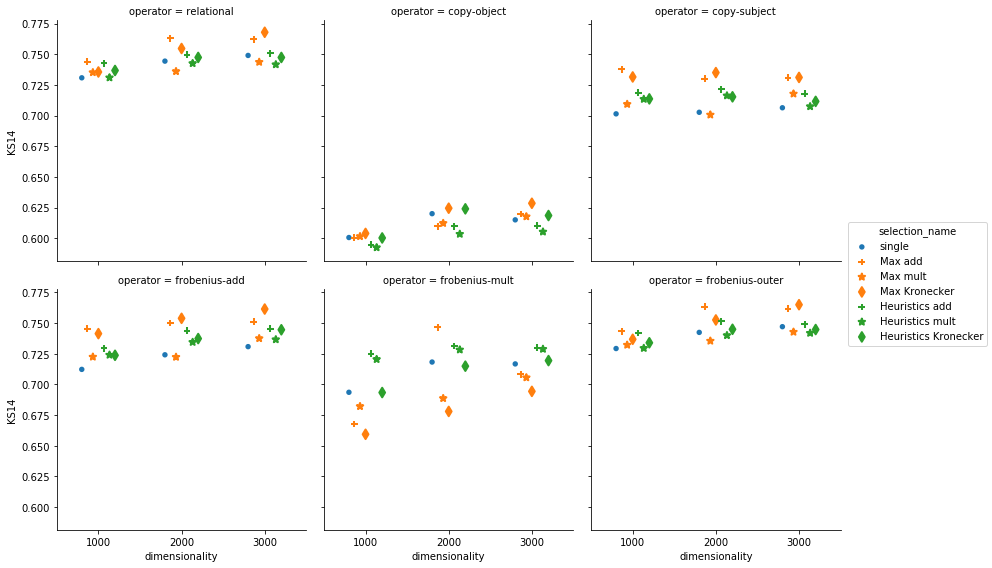

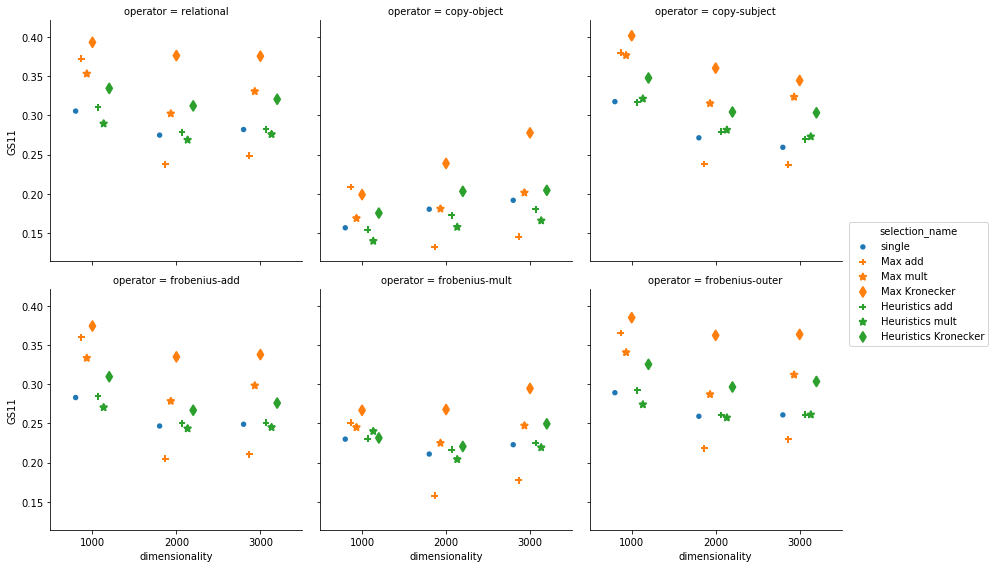

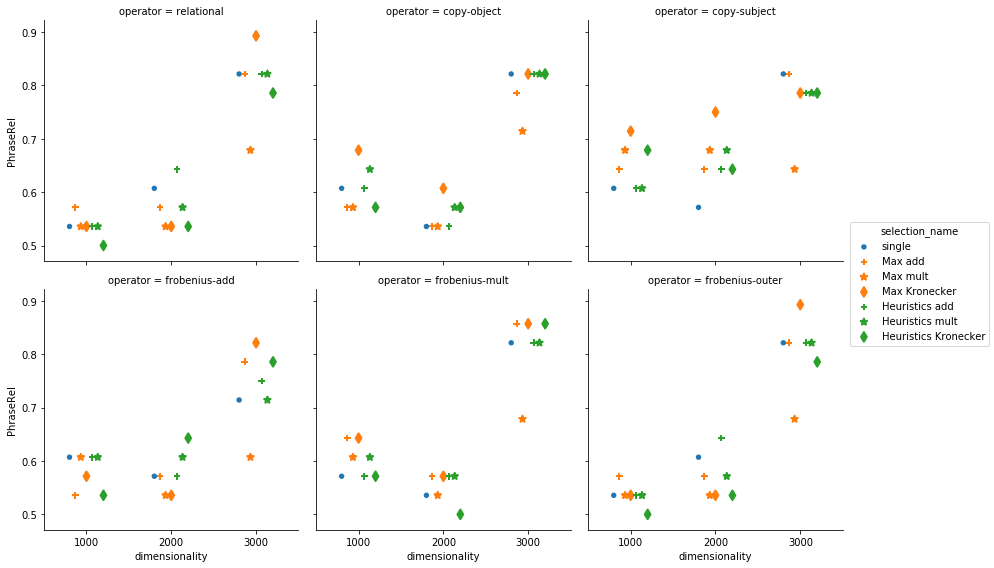

In [284]:
for dataset in 'KS14', 'GS11', 'PhraseRel':
    g = sns.factorplot(
        data=frobenius_results.replace(
            {
                'selection_name': {
                    'single_head': 'single',

                    'universal_max_add': 'Max add',
                    'universal_max_mult': 'Max mult',
                    'universal_max_kron': 'Max Kronecker',

                    'universal_heuristics_add': 'Heuristics add',
                    'universal_heuristics_mult': 'Heuristics mult',
                    'universal_heuristics_kron': 'Heuristics Kronecker',
                }
            }
        ),
        y=dataset,
        x='dimensionality',
        hue='selection_name',
        hue_order=[
            'single',
            'Max add', 'Max mult', 'Max Kronecker',
            'Heuristics add', 'Heuristics mult', 'Heuristics Kronecker',
        ],
        markers=['.', '+', '*', 'd', '+', '*', 'd'],
        col='operator',
        col_order=[
            'relational',
            'copy-object',
            'copy-subject',
            'frobenius-add',
            'frobenius-mult',
            'frobenius-outer',
        ],
        col_wrap=3,
        dodge=0.4,
#         kind='strip',
        linestyles='',
        palette=[
            sns.color_palette()[0],
            sns.color_palette()[1], sns.color_palette()[1], sns.color_palette()[1],
            sns.color_palette()[2], sns.color_palette()[2], sns.color_palette()[2],
        ]
    )
    
    g.fig.savefig('figures/frobenius-{}-plot.pdf'.format(dataset))

In [285]:
dataset_mapping['single'] = max_selection_single, heuristics_selection_single

In [286]:
for to_i, to_ in enumerate(('SimLex999', 'men', 'KS14', 'GS11', 'PhraseRel')):
    for method_i, method in (0, 'max'), (-1, 'heuristics'):
        print(
            '{from_} -> {to_}, {method}: {:.3f}'.format(
                t.average_error(
                    dataset_mapping[to_][0].loc[['head', 'add', 'mult', 'kron']],
                    dataset_mapping['single'][method_i].loc[['head', 'add', 'mult', 'kron']],
                    to_,
                ),
                from_='single',
                to_=to_,
                method=method,
            )
        )

single -> SimLex999, max: 0.049
single -> SimLex999, heuristics: 0.062
single -> men, max: 0.032
single -> men, heuristics: 0.045
single -> KS14, max: 0.063
single -> KS14, heuristics: 0.076
single -> GS11, max: 0.106
single -> GS11, heuristics: 0.090
single -> PhraseRel, max: 0.116
single -> PhraseRel, heuristics: 0.139


In [287]:
for to_i, to_ in enumerate(('SimLex999', 'men', 'KS14', 'GS11', 'PhraseRel')):
    for method_i, method in (0, 'max'), (-1, 'heuristics'):
        for operator in 'head', 'add', 'mult', 'kron':
            operator_from = operator
            if to_ in ('SimLex999', 'men'):
                operator_from = 'head'

            print(
                '{from_} -> {to_}, {method}, {operator}: {:.3f}'.format(
                    t.average_error(
                        dataset_mapping[to_][0].loc[operator_from],
                        dataset_mapping['single'][method_i].loc[operator],
                        to_,
                    ),
                    from_='single',
                    to_=to_,
                    method=method,
                    operator=operator,
                )
            )

single -> SimLex999, max, head: 0.049
single -> SimLex999, max, add: 0.049
single -> SimLex999, max, mult: 0.049
single -> SimLex999, max, kron: 0.049
single -> SimLex999, heuristics, head: 0.062
single -> SimLex999, heuristics, add: 0.062
single -> SimLex999, heuristics, mult: 0.062
single -> SimLex999, heuristics, kron: 0.062
single -> men, max, head: 0.032
single -> men, max, add: 0.032
single -> men, max, mult: 0.032
single -> men, max, kron: 0.032
single -> men, heuristics, head: 0.045
single -> men, heuristics, add: 0.045
single -> men, heuristics, mult: 0.045
single -> men, heuristics, kron: 0.045
single -> KS14, max, head: 0.124
single -> KS14, max, add: 0.030
single -> KS14, max, mult: 0.043
single -> KS14, max, kron: 0.036
single -> KS14, heuristics, head: 0.151
single -> KS14, heuristics, add: 0.044
single -> KS14, heuristics, mult: 0.047
single -> KS14, heuristics, kron: 0.036
single -> GS11, max, head: 0.100
single -> GS11, max, add: 0.176
single -> GS11, max, mult: 0.056
